 <font size="6">Автоэнкодеры</font>

# Автоэнкодер (AE)

## Unsupervised learning

*If intelligence is a cake, the bulk of the cake is unsupervised learning, the icing on the cake is supervised learning, and the cherry on the cake is reinforcement learning.* — **Yann LeCun**



Сегодня мы разберем подход, который относится к задаче обучения без учителя (**unsupervised learning**), когда объекты известны, но им не сопоставлены метки, которые мы должны тем или иным способом предсказывать.

Разницу между двумя задачами можно понять при помощи картинки, представленной ниже.


**Supervised learning**

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/supervised_learning.png" alt="alttext" width="550">

**Unsupervised learning**

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/unsupervised_learning.png" alt="alttext" width="550">

В случае **supervised learning** для каждого объекта нам известна метка, что вот это — изображение яблок, это — изображение груш и т.д. Далее модель учится по изображению определять фрукт.

В случае же **unsupervised learning** модель просматривает все изображения фруктов, не зная, где какой фрукт находится, и далее формирует представление, которое **неявно** делит фрукты по похожести.



Зачем вообще изучать такой тип задачи?

1. Иногда у нас слишком мало размеченных объектов, чтобы учить на них какую-либо задачу классификации и т. д. При этом у нас огромное количество неразмеченных данных. Мы можем **надеяться**, что если мы как-то обработаем наши данные, то они сами разделятся каким-то образом, согласующимся с метками.

2. Человеческий мозг в основном учится в unsupervised манере. Возможно, для того, чтобы решать задачи, которые легко по сравнению с компьютером решает человек, нам стоит и компьютер учить похожим образом.

3. Часто обучение без учителя дает результаты, которые в дальнейшем позволяют быстро адаптироваться к новым задачам обучения с учителем и переключаться между ними. Причем делать это **эффективнее**, чем transfer learning. (*Stop learning tasks, start learning skills* — Satinder Singh).

## Representation learning

Одной из областей, тесно связанных с unsupervised learning, является обучение представлениям (**representation learning**).

Как уже обсуждалось ранее, крайне важным шагом в решении задач машинного обучения может стать предобработка данных, зависящая от используемой модели. В течение долгого времени исследователям приходилось вручную готовить данные: к примеру, используя **domain knowledge** или разведочный анализ данных (**EDA** — **exploratory data analysis**), отбрасывать малозначимые признаки или создавать новые признаки.

Ниже приведён пример задачи классификации, при решении которой с помощью линейной модели нельзя обойтись без создания новых признаков:  
- каждый объект описывается вектором из двух компонент: $\mathbf{x} = (x_1, x_2)$

- истинное правило классификации выглядит следующим образом:

$$
\begin{equation}
  f(\mathbf{x}) =
  \begin{cases}
    0, & \left\Vert\mathbf{x}\right\Vert_2 > 5 \\
    1, & \text{otherwise}
  \end{cases}
\end{equation}
$$

In [ ]:
import numpy as np

np.random.seed(42)

x = np.random.uniform(-10, 10, size=(1000, 2))
y = (((x**2).sum(axis=1) ** 0.5) <= 5).astype(int)

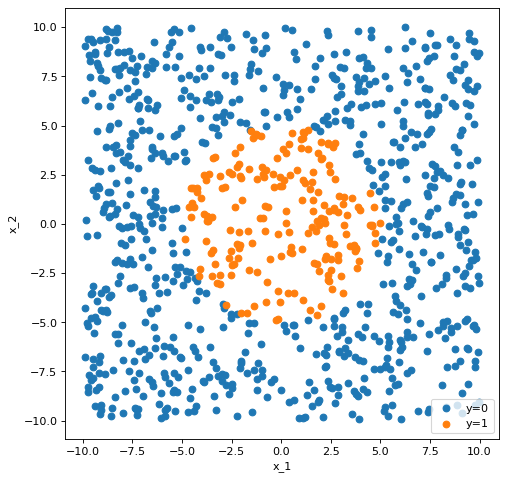

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7), dpi=80)
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1])
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1])

plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(["y=0", "y=1"]);

Можно попробовать обучить логистическую регрессию на данном наборе данных, однако результат будет неудовлетворительным:

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

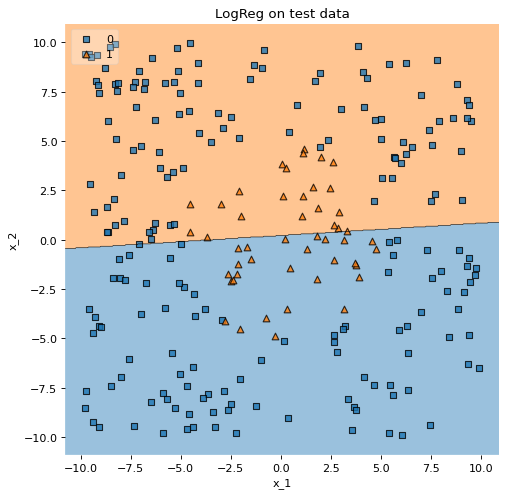

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(7, 7), dpi=80)
plot_decision_regions(x_test, y_test, clf=lr, legend=2)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("LogReg on test data")
plt.show()

Теперь давайте численно измерим качество работы обученной модели. Использовать будем F1-score, поскольку классы не сбалансированы.

In [ ]:
from sklearn.metrics import f1_score

pred = lr.predict(x_test)
f1_lr = f1_score(y_test, pred)
print(f"F1-score for naive model: {round(f1_lr, 4)}")

F1-score for naive model: 0.2486


Видно, что значение довольно низкое, следовательно, необходимо попробовать неким образом предобработать данные. Как мы понимаем, просто удаление признака не улучшит качество модели, поэтому можно попробовать придумать новый, более значимый признак.

Мы можем заметить, что форма разделяющей кривой в данном случае напоминает окружность. Соответственно, можно воспользоваться неким вариантом радиально-базисной функции (**radial basis function**). В качестве метрики расстояния воспользуемся $L_2$, и попробуем найти центр окружности.

Центр можно искать несколькими способами, однако мы воспользуемся простейшим: усредним значения точек, в которых $f(\mathbf{x}) = 1$.

In [ ]:
empiric_center = x_train[y_train == 1].mean(axis=0)
print(f"Empiric value of the center: {empiric_center}")

Empiric value of the center: [-0.03981501  0.40565097]


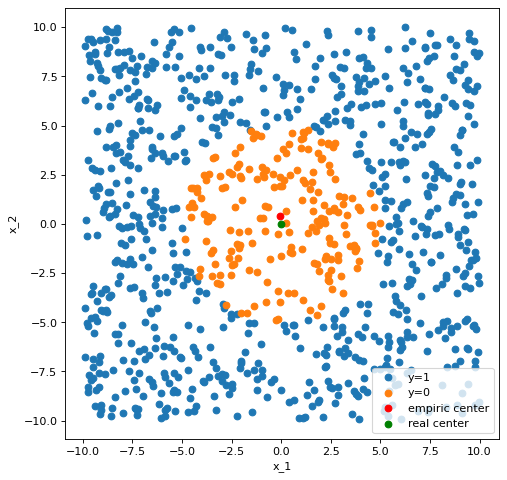

In [ ]:
plt.figure(figsize=(7, 7), dpi=80)
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1])
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1])
plt.scatter(empiric_center[0], empiric_center[1], c="r")
plt.scatter(0, 0, c="g")


plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(["y=1", "y=0", "empiric center", "real center"]);

Теперь давайте создадим признак, соответствующий $L_2$-расстоянию от каждой из точек до предполагаемого центра окружности:

In [ ]:
x_new = ((x - empiric_center) ** 2).sum(axis=1) ** 0.5
x_train_new = ((x_train - empiric_center) ** 2).sum(axis=1) ** 0.5
x_test_new = ((x_test - empiric_center) ** 2).sum(axis=1) ** 0.5

Теперь давайте визуально и численно оценим, насколько хорошо новый признак подходит для решения задачи классификации:

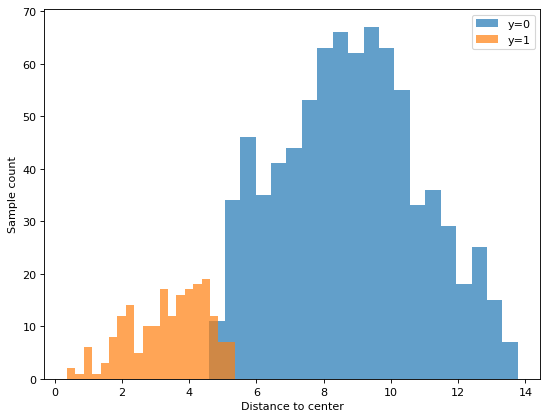

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(x_new[y == 0], bins=20, alpha=0.7)
plt.hist(x_new[y == 1], bins=20, alpha=0.7)

plt.ylabel("Sample count")
plt.xlabel("Distance to center")
plt.legend(["y=0", "y=1"]);

In [ ]:
lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train_new.reshape(-1, 1), y_train)
pred = lr.predict(x_test_new.reshape(-1, 1))
f1_rbf = f1_score(y_test, pred)
print(f"F1-score for RBF model: {round(f1_rbf, 4)}")

F1-score for RBF model: 0.92


Теперь качество работы модели на тестовых данных довольно высоко, однако признаки создавались вручную с использованием гипотезы, которая, к счастью, оказалась верной. В реальности при использовании моделей классического машинного обучения приходится довольно упорно исследовать данные, рисовать большое количество графиков, выдвигать и опровергать огромное количество гипотез, тратя уйму времени.

К счастью, глубокие нейронные сети позволяют решить все эти проблемы, автоматизируя поиск осмысленных и полезных комбинаций признаков, обращая внимание на важные признаки и не уделяя внимание признакам неважным. В процессе работы нейронной сети от слоя к слою формируются различные **представления данных**.

По сути представление объекта является неким численным описанием данного объекта. В примере выше исходным представлением объекта было численное описание положения объекта на плоскости $(x_1, x_2)$. После этого мы создали новое представление объекта, являющееся описанием $L_2$-расстояния от положения объекта на плоскости $(x_1, x_2)$ до эмпирического центра окружности $\left(x_{1_c}, x_{2_c}\right)$.  

<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L13/representation_change.png" alt="alttext" width="1200">

В итоговом представлении мы сохранили информацию, пригодную лишь для того, чтобы решать поставленную перед нами задачу. Таким образом, **полученное итоговое представление не универсально**. Оно подходит для решения крайне узкого круга задач, связанных с расстоянием до определённой точки.

К примеру, созданное нами представление (расстояние от точки до эмпирического центра окружности) слабо подходит для решения такой задачи классификации, как:

$$
\begin{equation}
  f(\mathbf{x}) =
  \begin{cases}
    0, & x_0 \leq 0 \\
    1, & \text{otherwise}
  \end{cases}
\end{equation}
$$

In [ ]:
y_new = x[:, 0] > 0

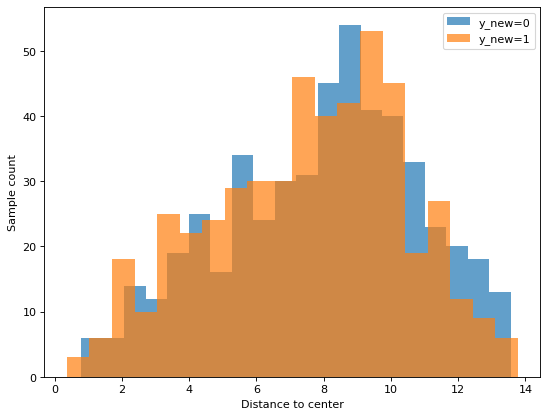

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(x_new[y_new == 0], bins=20, alpha=0.7)
plt.hist(x_new[y_new == 1], bins=20, alpha=0.7)

plt.ylabel("Sample count")
plt.xlabel("Distance to center")
plt.legend(["y_new=0", "y_new=1"])

plt.show()

Отметим, что в нашем случае **чем лучше избранное представление подходит для решения изначальной задачи, тем хуже оно подходит для решения второй задачи** (чем точнее найден центр окружности, тем ближе друг к другу будут результирующие представления двух точек $(x_0, t)$ и $(-x_0, t)$).

Аналогичным образом, автоматически найденные в нейронных сетях представления данных пригодны лишь для решения поставленной перед ними задачи. Однако постановка задачи может быть разной: можно либо обучить нейронную сеть предсказывать определённую величину (**supervised** подход, которым мы пользовались на протяжении всего курса), либо каким-то образом заставить нейронную сеть "понять" структуру данных в общем (**unsupervised** подход).

**Unsupervised** подход в общем случае позволяет создать более универсальные скрытые представления данных, учитывая при этом практически всю доступную информацию о данных.

## Снижение размерности

Еще одной областью, тесно связанной с предыдущими двумя, является задача снижения размерности — когда мы хотим данные из пространства высокой размерности преобразовать в пространство более низкой размерности с сохранением одного или нескольких свойств, например:

* данные реконструируются обратно почти без ошибки;
* расстояние между объектами сохраняется.

Зачем это нужно? По многим причинам.

Многие алгоритмы показывают себя плохо на пространствах большой размерности в принципе ([проклятье размерности](https://en.wikipedia.org/wiki/Curse_of_dimensionality)).

Некоторые алгоритмы просто работают значительно дольше, при этом качество их работы не изменится от уменьшения размерности.

Понижение размерности позволяет использовать память более эффективно и подавать модели на обучение за один раз больше объектов.

Также понижение размерности помогает избавиться от шума. Как? Обсудим дальше.

## Архитектура автоэнкодера

Автоэнкодер — архитектура нейросети, которая сначала с помощью нейросети-энкодера сжимает признаковое описание объекта в вектор небольшой размерности (он называется скрытым представлением), а затем восстанавливает этот вектор в исходное признаковое пространство с помощью нейросети-декодера.

Практика показывает, что при работе с изображениями скрытое представление картинки позволяет делать очень интересные и красивые вещи — например, очищать изображение от шума, проводить гладкую интерполяцию между двумя написанными от руки цифрами, генерировать новую рукописную цифру со стилем от имеющейся.



Откуда берутся эти свойства? Они являются следствием сжатия информации. Одна из форм сжатия — это классификация, которую мы уже делали. Если это цифры, то вместо изображения можно сохранить только один признак — какая это цифра. Это предельное сжатие информации, но при попытке перевести цифру в картинку мы уже не имеем достаточно информации, чтобы картинка получалась разной. Если не так сильно ограничивать информацию в точке максимального сжатия, то кроме класса цифры сохранится еще что-то и изображение удастся восстановить с большим количеством сохранённых деталей.


<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/autoencoder_architecture.png" alt="alttext" width="400">


## Сжатие информации и потери

Автоэнкодер может быть без потерь и с потерями (lossless и lossy). В какой-то степени это альтернативно методам сжатия архиваторов и кодирования контента (zip, mp3, jpeg, flac, ...). Можно ли сделать сжатие на нейронных сетях с помощью автоэнкодеров? Да, это будет работать. Размер сети будет большим, но сжатие может превзойти другие алгоритмы. Практический пример — [проект Google Lyra](https://ai.googleblog.com/2021/02/lyra-new-very-low-bitrate-codec-for.html), в котором подобный подход был применен для компрессии звука, и проект [NVIDIA Maxine](https://developer.nvidia.com/maxine), где в свою очередь сжимают видео.


<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/autoencoder_scheme.png" width="1000">


Почему это может работать? Дело в том, что нейронная сеть может сформулировать набор правил, по которому на основе латентного представления приближенно или точно кодировать (за счет кодировщика), а затем восстанавливать исходный объект (при помощи декодировщика).






<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/original_space_to_latent_space.png" alt="alttext" width="600">


А почему мы уверены, что такой набор правил будет существовать, и мы вообще имеем право понижать размерность пространства?


## Manifold assumption

В глубоком обучении часто используют предположение о многообразии (manifold assumption). Это предположение о том, что реальные данные не распределены равномерно по пространству признаков, а занимают лишь его малую часть — **многообразие** (manifold).

Если предположение верно, то каждый объект может быть достаточно точно описан новыми признаками в пространстве значительно меньшей размерности, чем исходное пространство признаков.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/manifold_assumption.png" alt="alttext" width="500">


В большинстве случаев это действительно так. Например, лица людей на фотографиях 300x300, очевидно, лежат в пространстве меньшей размерности, нежели 90&nbsp;000. Ведь не каждая матрица 300 на 300, заполненная какими-то значениями от 0 до 1, даст нам изображение человека.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/manifold_assumption_faces_example.png" alt="alttext" width="700">


## Метод главных компонент (PCA)

Метод главных компонент (Principal Component Analysis) — это метод отображения векторов свойств объектов (помним, что у нас объект всегда описывается вектором свойств, длина вектора — это количество свойств) в вектора производных свойств (**компонент**) меньшей длины с помощью линейной комбинации, чтобы обратной операцией можно было восстановить значения векторов свойств как можно ближе к исходным. То есть PCA тоже выполняет сжатие информации, он тоже работает для группы объектов (а нейронная сеть автоэнкодера учится под определённую группу объектов).


Обычно PCA работает для центрированных переменных. Каждая следующая компонента проводится перпендикулярно предыдущим и так, чтобы объяснить наибольшую часть дисперсии, не объясненной предыдущими компонентами.


<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/3d_to_2d_pca.png" width=1000/>



Графически можно представить PCA, как поиск подпространства, проекция точек на которое минимально меняет координаты в исходном пространстве. Например, для объектов на плоскости PCA можно сделать в одномерное пространство — на&nbsp;прямую.



<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/pca_decomposition.png" width="1000">



Прямая определяется только вектором нормали, то есть линия проекции проходит через 0.

Вернемся к примеру с лицами — долгое время для распознавания лиц размерности 128\*128 использовалось представление, полученное при помощи PCA. Для хорошего качества восстановления хватает около 100 компонент.

## Аналогия AE и PCA

Отличия PCA и AE в том, что PCA выполняет линейную комбинацию над компонентами исходного вектора свойств объекта, а AE, как правило, нелинейную. PCA вычисляется однозначно, а AE обучается без гарантии нахождения наилучшего положения. PCA гарантирует ортогональный базис для разложения сжатых свойств, а AE — нет.

PCA будет частным случаем AE, если в AE сделать только **один полносвязный скрытый слой** с количеством нейронов, равным требуемому числу компонент, сделать линейную функцию активации, и использовать среднеквадратическую функцию потерь (MSE). Кроме этого, необходимо будет нормировать признаки перед подачей их на вход AE.



<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/pca_autoencoder.png" alt="alttext" width="500">



Тогда PCA позволяет рассчитать веса для нейронов такого автоэнкодера. При этом гарантировав (в отличие от градиентного спуска) наилучшее решение задачи.

## Очищение изображения от шумов

Интересное применение автоэнкодеров — очищение входной картинки от шумов. Такое принципиально возможно из-за того, что размерность латентного пространства очень мала по сравнению с размерностью входного пространства — в нём попросту нет места случайному шуму, но зато есть место для общих закономерностей из входного пространства.

То есть мы подаём на обучении автоэнкодера такой незашумлённый датасет, что в нём на самом деле есть некое пространство свойств, которое его описывает. На выходе энкодера в изображении останутся именно эти свойства. Шум является внешним свойством и не сможет закодироваться.

Иными словами, за счет кодировщика и декодировщика автоэнкодер выучивается «проектировать» объекты на латентное пространство и восстанавливать их из него. Если шум небольшой, то автоэнкодер спроецирует объект в нужное место в латентном пространстве и обратно восстановит его уже без шума.





<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/autoencoder_clean_noise.png" alt="alttext" width="700">


При этом важно понимать, что если шум поместит наш объект так, что автоэнкодеру придется выбирать между разными вариантами проекции, могут возникнуть артефакты.

В случае, приведенном на рисунке, зашумленному $x$ соответствуют две группы объектов из реального датасета. Если мы, к примеру, оптимизируем MSE, то автоэнкодеру «экономнее» всего будет восстанавливать нечто между двумя группами. При этом этого «нечто» в природе не существует или оно очень маловероятно.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/reconstructed_between_2_distribution.png" alt="alttext" width="400">


### Добавление шума к исходной выборке

Также в случае отсутствия шума в изначальной выборке, ее малом размере и т.д. можно добавлять шум к самим исходным данным, получая из объекта $x$ объект $\tilde{x}$ и требуя от энкодера восстановить на основе зашумленного объекта исходный.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/denoising_autoencoder.png" alt="alttext" width="350">


Этот подход может работать и является примером *аугментации данных*. Он может дополнительно заставить автоэнкодер выучивать полезные признаки, т.е. его можно использовать, даже если целью не является получение автоэнкодера, избавляющего данные от шума.

С ним, однако, надо быть очень аккуратным:

1. Шум, который вы добавляете, не должен сильно менять исходный объект. Если это происходит, то либо автоэнкодер легко будет находить места, где был добавлен шум, и при этом делать ему это будет легче, чем учить сжатое представление данных. Либо автоэнкодер выучит о ваших данных что-то такое, чего там на самом деле быть не может. К примеру, если добавить к признакам, которые всегда целые, нормальный шум, ничего хорошего не выйдет.

2. Шум должен соответствовать «естественному шуму». Если реальный шум в данных отличается от того, на котором учился автоэнкодер, есть вероятность, что он не будет очищать данные от исходного шума.

## PCA для избавления от шума

Давайте применим PCA как простейший автоэнкодер для очищения от шумов изображений базы MNIST. Нам потребуется база MNIST, NumPy, библиотека отрисовки matplotlib и сам PCA, который есть в пакете sklearn.

In [ ]:
import torchvision
from torchvision.datasets import MNIST
from IPython.display import clear_output

root = "./data"

train_set = MNIST(
    root=root, train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_set = MNIST(
    root=root, train=False, transform=torchvision.transforms.ToTensor(), download=True
)
clear_output()

Загрузим данные и приведём размерность к двумерной, чтобы это был набор векторов свойств.

In [ ]:
x_train = train_set.data.numpy()
y_train = train_set.targets.numpy()
x_test = test_set.data.numpy()
y_test = test_set.targets.numpy()

x_train, x_test = x_train / 255.0, x_test / 255.0  # normalize data to [0; 1]
x_train_shape = x_train.shape
print("Initial shape ", x_train_shape)
x_train_flatten = x_train.reshape(
    -1, x_train_shape[1] * x_train_shape[2]
)  #  reshape to vector, 28*28 => 784
print("Reshaped to ", x_train_flatten.shape)

Initial shape  (60000, 28, 28)
Reshaped to  (60000, 784)


То же самое, но графически:

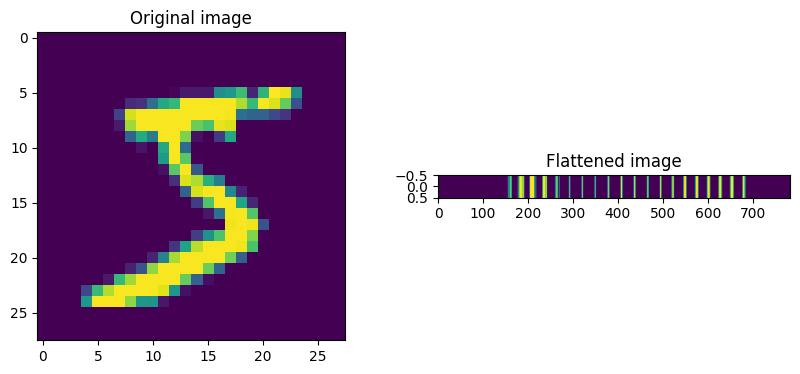

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].imshow(x_train[0])
ax[1].imshow(x_train_flatten[0].reshape(1, -1), aspect=50)
ax[0].set_title("Original image")
ax[1].set_title("Flattened image");

Теперь заведём класс PCA и настроим его, чтобы он отобрал столько компонент, чтобы объяснялось 90% дисперсии. Обучим его и посмотрим, сколько ему потребовалось свойств, для описания каждой картинки.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
x_train_encoded = pca.fit_transform(x_train_flatten)
print("Encoded features ", pca.n_components_)

Encoded features  87


Энкодер (он же декодер, ведь это просто обратная матрица от энкодера PCA) обучен. Теперь можно проверить, как он закодирует и раскодирует тестовую выборку. Для этого проведём такие же преобразования размерности для неё.

In [ ]:
x_test_shape = x_test.shape
x_test_flat = x_test.reshape(-1, x_test_shape[1] * x_test_shape[2])
x_test_encoded = pca.transform(x_test_flat)
x_test_decoded = pca.inverse_transform(x_test_encoded).reshape(x_test_shape)
print("x_test_decoded shape is ", x_test_decoded.shape)

x_test_decoded shape is  (10000, 28, 28)


Теперь нужно определить функцию для отрисовки изображений MNIST. Она будет выводить несколько изображений в ряд, поэтому будет принимать трёхмерный массив. Шкала не должна быть автоподстраиваемой, так как после обработки изображения выйдут за диапазон $[0;1]$, в котором заданы исходные изображения. Мы зафиксируем шкалу в диапазоне $[0;1]$.

In [ ]:
def plot_imgs(imgs, title):
    fig = plt.figure(figsize=(16, 3))
    columns = imgs.shape[0]
    rows = 1
    for i in range(columns):
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(imgs[i], cmap="gray_r", clim=(0, 1))
    fig.suptitle(title)
    plt.show()

Выведем исходное и закодированное-раскодированное изображение для некоторых объектов, которые мы случайным образом выберем из всей тестовой выборки.

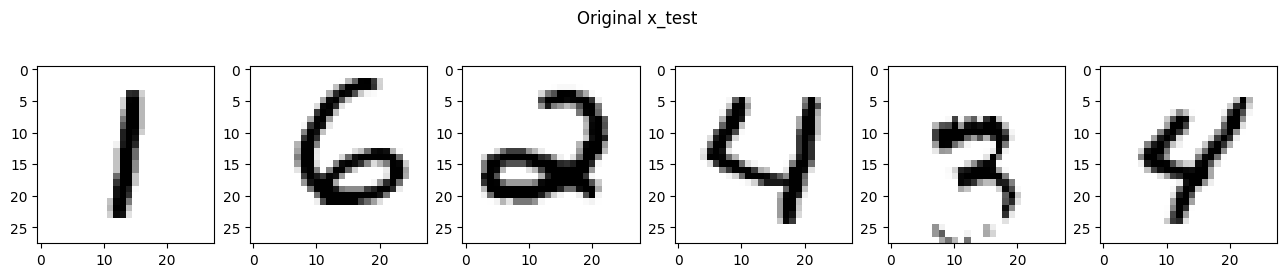

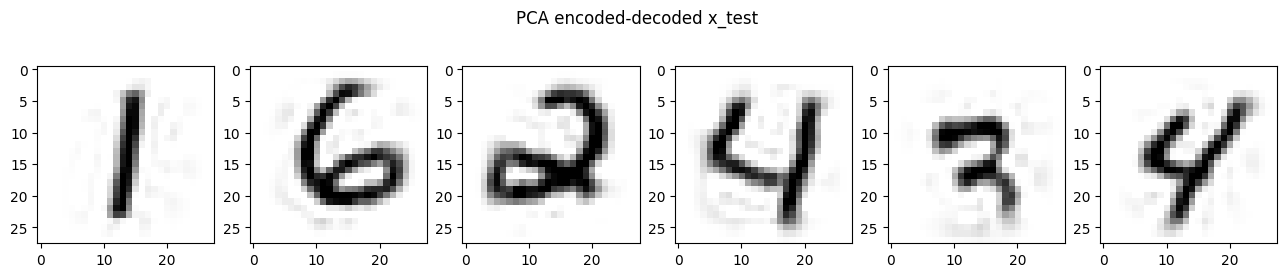

In [ ]:
np.random.seed(42)

sample_indices = np.random.choice(x_test.shape[0], 6)
samples_orig = x_test[sample_indices]
samples_decoded = x_test_decoded[sample_indices]
plot_imgs(samples_orig, "Original x_test")
plot_imgs(samples_decoded, "PCA encoded-decoded x_test")

Видно, что `pca.n_components_` (87 для 90% PCA) достаточно для описания картинок MNIST вместо 784 исходных пикселей. Но при этом нужно хранить матрицу кодирования-декодирования, а изображения получаются немного зашумлёнными. Мы получили способ сжатия с потерями для рукописных цифр, где изображение центрировано и отмасштабировано по рамке из 28х28 пикселей (подробней смотрите правила базы MNIST).

Степень сжатия у нас условно 87/784 ~= 0.11. То есть сжатие в 9 раз. «Условно», так как сжатое изображение хранится во float, а исходное в uint8, который требует в 4 раза меньше байт, плюс мы должны хранить матрицы для кодирования и декодирования.

Теперь посмотрим, как наш автоэнкодер без нейросетей справится с очисткой от зашумления. Для этого сделаем функцию добавления шумов к MNIST и посмотрим результат.

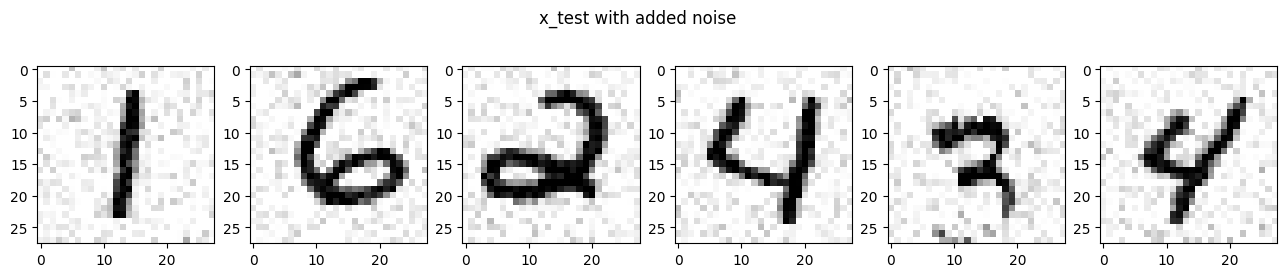

In [ ]:
from skimage.util import random_noise

np.random.seed(42)

x_test_noisy = random_noise(x_test, mode="gaussian")
samples_noisy = x_test_noisy[sample_indices]
plot_imgs(samples_noisy, "x_test with added noise")

Теперь нужно провести ту же операцию PCA энкодера и декодера, что выше.

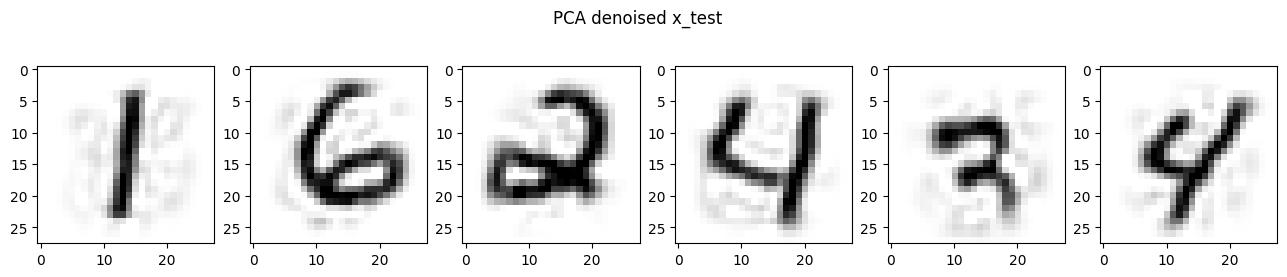

In [ ]:
def PCArecode(dataset):
    dataset_flat = dataset.reshape(-1, dataset.shape[1] * dataset.shape[2])
    encoded = pca.transform(dataset_flat)
    decoded = pca.inverse_transform(encoded).reshape(dataset.shape)
    return decoded


x_filtered = PCArecode(x_test_noisy)
samples_filtered = x_filtered[sample_indices]
plot_imgs(samples_filtered, "PCA denoised x_test")

Для простоты сравнения напишем функцию, которая будет строить зашумленные и восстановленные образцы друг под другом.

In [ ]:
def plot_samples(*args, invert_colors=True, digit_size=28, name=None, single_size=2):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    figure = np.zeros((digit_size * len(args), digit_size * n))

    for i in range(n):
        for j in range(len(args)):
            figure[
                j * digit_size : (j + 1) * digit_size,
                i * digit_size : (i + 1) * digit_size,
            ] = args[j][i].squeeze()

    if invert_colors:
        figure = 1 - figure

    plt.figure(figsize=(single_size * n, single_size * len(args)))

    plt.imshow(figure, cmap="Greys_r", clim=(0, 1))

    plt.grid(False)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if name is not None:
        plt.savefig(name)
    plt.show()

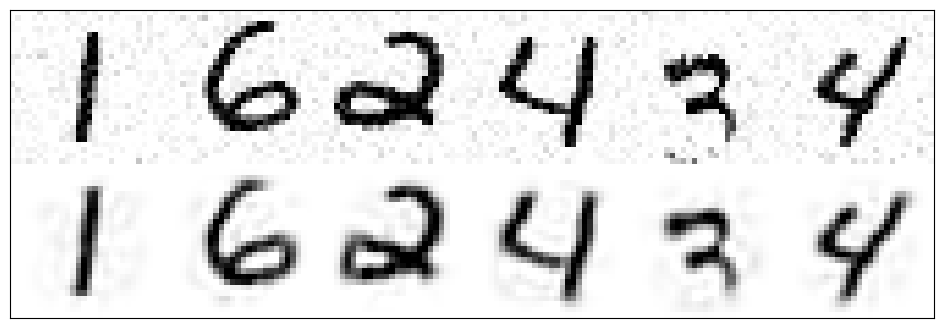

In [ ]:
plot_samples(samples_noisy, samples_filtered)

Итак, шумы стали значительно меньше, но и артефакты вокруг цифр усилились. Это неудивительно, ведь мы сжимали информацию линейным образом всего в 87 компонент. Повышение уровня сжатия приведёт к еще большему количеству артефактов.

### Латентное представление цифр после PCA

Посмотрим теперь на то, как разделяются изображения разных цифр в латентном представлении.

In [ ]:
def pca_latent(dataset):
    dataset_flat = dataset.reshape(-1, dataset.shape[1] * dataset.shape[2])
    return pca.transform(dataset_flat)

In [ ]:
def plot_manifold(latent_r, labels=None, alpha=0.9, title=None):
    plt.figure(figsize=(8, 8))
    if labels is None:
        plt.scatter(latent_r[:, 0], latent_r[:, 1], alpha=alpha)
        if title:
            plt.title(title)
    else:
        plt.scatter(latent_r[:, 0], latent_r[:, 1], c=labels, cmap="tab10", alpha=alpha)
        plt.colorbar()
        if title:
            plt.title(title)
    plt.show()

Построим на двумерной плоскости первые две компоненты признаков, выделенных PCA — они объясняют максимум дисперсии исходных признаков.

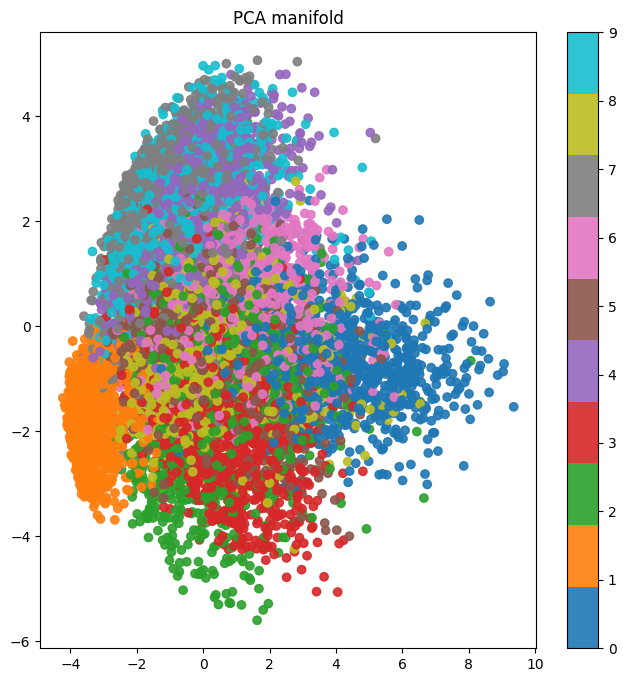

In [ ]:
latent_r = pca_latent(x_test)
plot_manifold(latent_r, y_test, title="PCA manifold")

Видим, что латентное представление слабо разделяет картинки по тому, какие цифры на них изображены. Только единицы расположены более-менее обособленно и плотно.

Брать лишь первые две компоненты из 87 не совсем честно. Поэтому переведем признаки, полученные методом PCA, из 87-мерного пространства в 2-мерное методом UMAP и посмотрим, выделяются ли классы.

In [ ]:
!pip install -q umap-learn
clear_output()

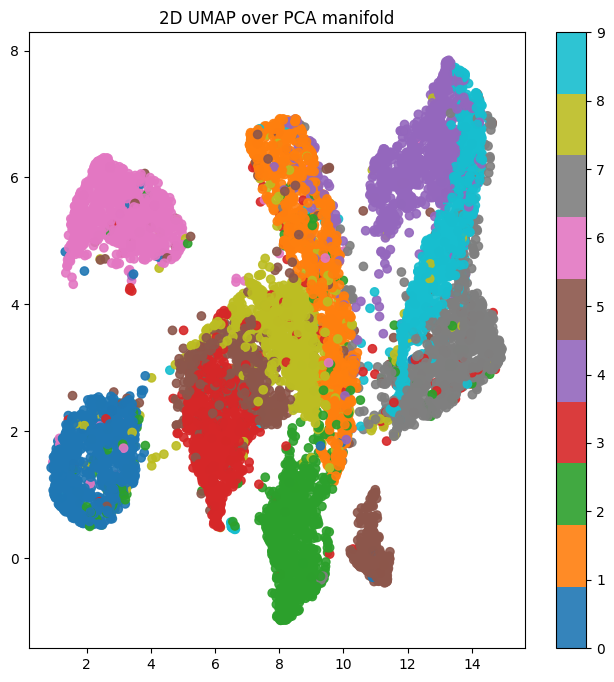

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler

scaled_latent_r = StandardScaler().fit_transform(latent_r)
reducer = umap.UMAP()
latent_r_2d = reducer.fit_transform(scaled_latent_r)
plot_manifold(latent_r_2d, y_test, title="2D UMAP over PCA manifold")

В латентном представлении цифры в среднем неплохо разделяются на отдельные кластеры, но многие отдельные изображения оказываются в "чужих" кластерах. Для такого простого датасета результат неудовлетворительный.

## Реализация автоэнкодера

Итак, вспомним, что в автоэнкодере одна сеть переводит пространство свойств в пространство меньшей размерности, а другая сеть обучается восстанавливать исходные объекты. Вместо вычисления коэффициентов сети мы будем её обучать. Для обучения нужно определить функцию потерь. Обычно используют среднеквадратичное расстояние (MSE). То есть мы требуем, чтобы значения пикселей исходного изображения и восстановленного отличались несильно. В нашем примере, мы будем использовать  Binary Cross-Entropy, она обеспечивает лучшую сходимость.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/nn_encoder_nn_decoder.png" alt="alttext" width="700">

Мы можем использовать любую сеть для энкодера и декодера: на полносвязных слоях или на свёрточных.

Теперь нужно задать архитектуру модели. Мы будем использовать последовательную модель (Sequential) и свёрточную  архитектуру. В конце кодировщика должен быть вектор с размером `latent_dim`. И декодировщик должен принимать этот вектор и восстанавливать до целого изображения.

In [ ]:
import torch.nn as nn


class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.latent_dim = latent_dim  # latent space size
        hidden_dims = [32, 64, 128, 256, 512]  # num of filters in layers
        modules = []
        in_channels = 1  # initial value of channels
        for h_dim in hidden_dims[:-1]:  # conv layers
            modules.append(
                nn.Sequential(
                    nn.Conv2d(
                        in_channels=in_channels,  # num of input channels
                        out_channels=h_dim,  # num of output channels
                        kernel_size=3,
                        stride=2,  # convolution kernel step
                        padding=1,  # save shape
                    ),
                    nn.BatchNorm2d(h_dim),
                    nn.LeakyReLU(),
                )
            )
            in_channels = h_dim  # changing number of input channels for next iteration

        modules.append(
            nn.Sequential(
                nn.Conv2d(
                    in_channels=256, out_channels=512, kernel_size=1
                ),  # changing the kernel size, because  size of the array (2*2)
                nn.BatchNorm2d(512),
                nn.LeakyReLU(),
            )
        )
        modules.append(nn.Flatten())  # to vector, size 512 * 2*2 = 2048
        modules.append(nn.Linear(512 * 2 * 2, latent_dim))

        self.encoder = nn.Sequential(*modules)

    def forward(self, x):
        x = self.encoder(x)
        return x


class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()

        hidden_dims = [512, 256, 128, 64, 32]  # num of filters in layers
        self.linear = nn.Linear(in_features=latent_dim, out_features=512)

        modules = []
        for i in range(len(hidden_dims) - 1):  # define ConvTransopse layers
            modules.append(
                nn.Sequential(
                    nn.ConvTranspose2d(
                        in_channels=hidden_dims[i],
                        out_channels=hidden_dims[i + 1],
                        kernel_size=3,
                        stride=2,
                        padding=1,
                        output_padding=1,
                    ),
                    nn.BatchNorm2d(hidden_dims[i + 1]),
                    nn.LeakyReLU(),
                )
            )

        modules.append(
            nn.Sequential(
                nn.ConvTranspose2d(
                    in_channels=hidden_dims[-1],
                    out_channels=hidden_dims[-1],
                    kernel_size=3,
                    stride=2,
                    padding=1,
                    output_padding=1,
                ),
                nn.BatchNorm2d(hidden_dims[-1]),
                nn.LeakyReLU(),
                nn.Conv2d(
                    in_channels=hidden_dims[-1],
                    out_channels=1,
                    kernel_size=7,
                    padding=1,
                ),
                nn.Sigmoid(),
            )
        )

        self.decoder = nn.Sequential(*modules)

    def forward(self, x):
        x = self.linear(x)  # from latents space to Linear
        x = x.view(-1, 512, 1, 1)  # reshape
        x = self.decoder(x)  # reconstruction
        return x

Напишем основную функцию для обучения нейросети. `single_pass_handler` и `loss_handler` будут меняться в зависимости от сети, которую мы обучаем.

In [ ]:
import torch.nn.functional as F

"""
Function to train model, parameters:
  encoder - encoder model
  decoder - decoder model
  loader - data loader
  optimizer - optimizer
  single_pass_handler - function for runing data through AE,
                        returns latent representation
                        and reconstructed image
  loss_handler - loss function
  epoch - number of current epoch, use for print log
  log_interval - log printing interval
"""


def train(
    encoder,
    decoder,
    loader,
    optimizer,
    single_pass_handler,
    loss_handler,
    epoch,
    log_interval=500,
):
    for batch_idx, (data, labels) in enumerate(loader):
        batch_size = data.size(0)
        optimizer.zero_grad()
        data = data.to(device)
        labels = labels.to(device)

        latent, recon = single_pass_handler(
            encoder, decoder, data, labels
        )  # latent vector and reconstructed image

        loss = loss_handler(data, recon, latent)  # compute loss
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]".format(
                    epoch,
                    batch_idx * len(data),
                    len(loader.dataset),
                    100.0 * batch_idx / len(loader),
                ).ljust(40),
                "Loss: {:.6f}".format(loss.item()),
            )


def ae_pass_handler(encoder, decoder, data, *args, **kwargs):
    latent = encoder(data)
    recon = decoder(latent)
    return latent, recon


def ae_loss_handler(data, recon, *args, **kwargs):
    return F.binary_cross_entropy(recon, data)

Зададим загрузчики наших данных:

In [ ]:
import torch

torch.manual_seed(42)

batch_size = 64
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=batch_size, shuffle=False
)

Создадим нашу нейросеть:

In [ ]:
import torch.optim as optim
from itertools import chain

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
torch.manual_seed(42)

latent_dim = 2  # size of latent space
learning_rate = 1e-4
encoder = Encoder(latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim)

encoder = encoder.to(device)
decoder = decoder.to(device)

optimizer = optim.Adam(
    chain(encoder.parameters(), decoder.parameters()), lr=learning_rate
)

Посмотрим на архитектуру:

In [ ]:
from torchsummary import summary

print(">>> Encoder")
print(summary(encoder, (1, 28, 28)))
print(">>> Decoder")
print(summary(decoder, (1, 2)))

>>> Encoder
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             320
       BatchNorm2d-2           [-1, 32, 14, 14]              64
         LeakyReLU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          18,496
       BatchNorm2d-5             [-1, 64, 7, 7]             128
         LeakyReLU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 4, 4]          73,856
       BatchNorm2d-8            [-1, 128, 4, 4]             256
         LeakyReLU-9            [-1, 128, 4, 4]               0
           Conv2d-10            [-1, 256, 2, 2]         295,168
      BatchNorm2d-11            [-1, 256, 2, 2]             512
        LeakyReLU-12            [-1, 256, 2, 2]               0
           Conv2d-13            [-1, 512, 2, 2]         131,584
      BatchNorm2d-14       

И обучим в течение 5 эпох:

In [ ]:
for i in range(1, 6):
    train(
        encoder=encoder,
        decoder=decoder,
        optimizer=optimizer,
        loader=train_loader,
        epoch=i,
        single_pass_handler=ae_pass_handler,
        loss_handler=ae_loss_handler,
        log_interval=500,
    )

Train Epoch: 1 [0/60000 (0%)]            Loss: 0.652564
Train Epoch: 1 [32000/60000 (53%)]       Loss: 0.201293
Train Epoch: 2 [0/60000 (0%)]            Loss: 0.191058
Train Epoch: 2 [32000/60000 (53%)]       Loss: 0.182135
Train Epoch: 3 [0/60000 (0%)]            Loss: 0.190518
Train Epoch: 3 [32000/60000 (53%)]       Loss: 0.178135
Train Epoch: 4 [0/60000 (0%)]            Loss: 0.184595
Train Epoch: 4 [32000/60000 (53%)]       Loss: 0.179005
Train Epoch: 5 [0/60000 (0%)]            Loss: 0.179098
Train Epoch: 5 [32000/60000 (53%)]       Loss: 0.176504


Напишем функцию, чтобы удобно прогонять датасет через обученную нейросеть

In [ ]:
"""
This function returns results of run data through AE
Parameters:
  encoder - encoder model
  decoder - decoder model
  loader - data loader
  single_pass_handler - function for runing data through AE,
                        returns latent representation
                        and reconstructed image
  return_real - return original images, True/False, default = True
  return_recon - return reconstructed images from decoder, True/False, default = True
  return_latent - return latent representation from encoder, True/False, default = True
  return_labels - return labels, True/False, default = True
"""


def run_eval(
    encoder,
    decoder,
    loader,
    single_pass_handler,
    return_real=True,
    return_recon=True,
    return_latent=True,
    return_labels=True,
):
    if return_real:
        real_list = []
    if return_recon:
        recon_list = []
    if return_latent:
        latent_list = []
    if return_labels:
        labels_list = []
    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(loader):
            if return_labels:
                labels_list.append(labels.numpy())
            if return_real:
                real_list.append(data.numpy())

            data = data.to(device)
            labels = labels.to(device)
            latent, recon = single_pass_handler(encoder, decoder, data, labels)

            if return_latent:
                latent_list.append(latent.cpu().numpy())
            if return_recon:
                recon_list.append(recon.cpu().numpy())

    result = {}
    if return_real:
        real = np.concatenate(real_list)
        result["real"] = real.squeeze()
    if return_latent:
        latent = np.concatenate(latent_list)
        result["latent"] = latent
    if return_recon:
        recon = np.concatenate(recon_list)
        result["recon"] = recon.squeeze()
    if return_labels:
        labels = np.concatenate(labels_list)
        result["labels"] = labels
    return result

Сначала оценим то, как ведет себя наш автоэнкодер и как работает в целом

In [ ]:
encoder = encoder.eval()
decoder = decoder.eval()

In [ ]:
run_res = run_eval(encoder, decoder, test_loader, ae_pass_handler)

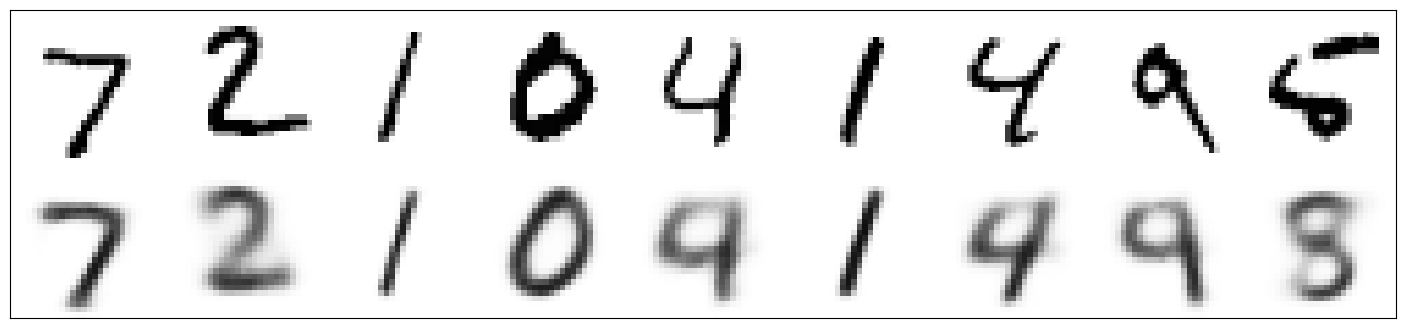

In [ ]:
plot_samples(run_res["real"][0:9], run_res["recon"][0:9])

И посмотрим, какое латетное представление он выучил.

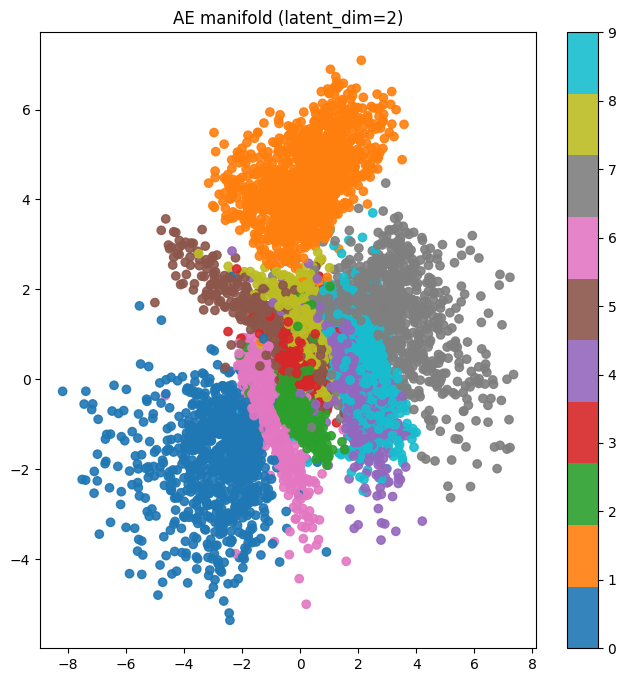

In [ ]:
plot_manifold(run_res["latent"], run_res["labels"], title="AE manifold (latent_dim=2)")

А теперь обучим автоэнкодер с латентным слоем размера 24 и посмотрим, как он будет бороться с шумом.

In [ ]:
torch.manual_seed(42)

latent_dim = 24
learning_rate = 1e-4
encoder = Encoder(latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim)


encoder = encoder.to(device)
decoder = decoder.to(device)

optimizer = optim.Adam(
    chain(encoder.parameters(), decoder.parameters()), lr=learning_rate
)

for i in range(1, 6):
    train(
        encoder=encoder,
        decoder=decoder,
        optimizer=optimizer,
        loader=train_loader,
        epoch=i,
        single_pass_handler=ae_pass_handler,
        loss_handler=ae_loss_handler,
        log_interval=500,
    )

Train Epoch: 1 [0/60000 (0%)]            Loss: 0.721638
Train Epoch: 1 [32000/60000 (53%)]       Loss: 0.107531
Train Epoch: 2 [0/60000 (0%)]            Loss: 0.098195
Train Epoch: 2 [32000/60000 (53%)]       Loss: 0.089939
Train Epoch: 3 [0/60000 (0%)]            Loss: 0.083436
Train Epoch: 3 [32000/60000 (53%)]       Loss: 0.088458
Train Epoch: 4 [0/60000 (0%)]            Loss: 0.083222
Train Epoch: 4 [32000/60000 (53%)]       Loss: 0.081985
Train Epoch: 5 [0/60000 (0%)]            Loss: 0.080795
Train Epoch: 5 [32000/60000 (53%)]       Loss: 0.085994


Сделаем dataloader, который добавляет в наш датасет шум автоматически

In [ ]:
class AddGaussianNoise:
    def __init__(self, mean=0.0, std=1.0):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + "(mean={0}, std={1})".format(
            self.mean, self.std
        )

Загрузим MNIST с добавленным шумом

In [ ]:
torch.manual_seed(42)

test_noise_set = MNIST(
    root=root,
    train=False,
    transform=torchvision.transforms.Compose(
        [torchvision.transforms.ToTensor(), AddGaussianNoise(0.0, 0.30)]
    ),
    download=True,
)

test_noised_loader = torch.utils.data.DataLoader(
    torch.utils.data.Subset(test_noise_set, list(range(64))),
    batch_size=batch_size,
    shuffle=False,
)

In [ ]:
run_res = run_eval(encoder, decoder, test_noised_loader, ae_pass_handler)

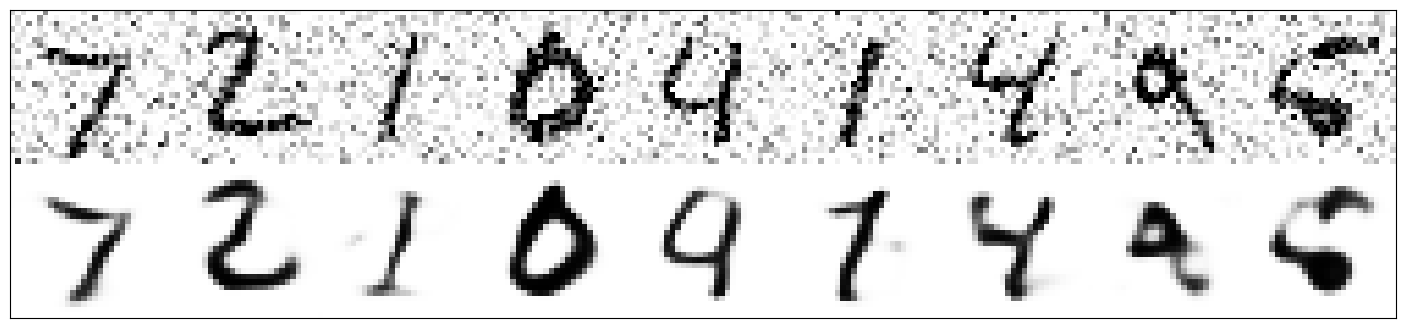

In [ ]:
plot_samples(run_res["real"][0:9], run_res["recon"][0:9])

Качество сжатия мы оценили визуально выше. Если обратить внимание, то можно заметить, что исходные картинки даже почистились от мелких шумов и странностей изображения и больше стали похожи на непрерывные линии. Размерность латентного пространства `latent_dim` равна 24, что значительно меньше исходного количества признаков (784), поэтому мы получили неплохое сжатие изображения.

Помимо понижения размерности и очистки данных от шума, автоэнкодеры имеют еще несколько полезных способов применения такие, как **обнаружение аномалий** и **предобучение на неразмеченных данных**.

## Обнаружение аномалий

Пусть мы имеем дело с задачей, когда у нас есть много данных, которые можно считать типичными, или "нормальными", и небольшое количество данных, являющихся нетипичными, или "аномальными". На практике, в нашем распоряжении может вообще не быть аномальных примеров, но мы можем ожидать, что они появятся в будущем, и мы бы хотели, чтобы модель могла отличить аномальные примеры от нормальных.

В такой постановке можно **обучить автоэнкодер только на данных, которые мы считаем нормальными**. В тестовую выборку мы включим аномальные примеры, если они имеются, а также некоторое количество нормальных примеров.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/ae_anomaly_detection_data.png" width="800">

Мы будем обучать автоэнкодер только на нормальных данных (иллюстрация ниже, слева). При обучении автоэнкодер будет минимизировать ошибку между входом и выходом (*ошибка реконструкции*).

Завершив обучение, мы вычисляем значения ошибки реконструкции на обучающих примерах, и строим распределение этих ошибок, по которому мы выбираем порог ошибки реконструкции (threshold). Порог выбирается исходя из задачи и требований к детекции. Он зависит от того, что для нас важнее: чаще находить аномалии или не допускать ложных срабатываний на "нормальных" объектах.

На этапе применения модели (inference, иллюстрация ниже, справа) мы подаем на обученный автоэнкодер как нормальные, так и аномальные примеры. **Нормальные примеры будут восстанавливаться автоэнкодером с малой ошибкой**, так как подобные примеры встречались во время обучения. Аномальные же примеры не встречались автоэнкодеру во время обучения, и он не сможет их качественно восстанавливать. **Ошибка реконструкции аномальных объектов будет большой.**

Сравнивая ошибку реконструкции с вычисленным ранее порогом, мы сможем обнаруживать и отделять аномальные примеры.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/ae_anomaly_detection_method.png" width="1000">

## Предобучение на неразмеченных данных

Еще одним практическим примером использования автоэнкодеров является предобучение на неразмеченных данных. Пусть мы имеем **большое количество неразмеченных данных и немного размеченных** (semi-supervised подход).

Мы можем обучить автоэнкодер на неразмеченных данных, ожидая, что он обучится эффективно представлять данные в латентном пространстве.

Затем мы используем **энкодер как предобученный экстрактор признаков**, добавляя к нему дополнительный классификатор, и обучаем такую модель на размеченных данных.

Такой подход похож на transfer learning, где мы тоже используем предобученный экстрактор признаков для решения задачи на небольшом количестве размеченных данных. Отличие в том, что **при transfer learning экстрактор признаков обучается на другой задаче с другими данными**, часто даже на данных из другого домена.

В случае использования автоэнкодера, предобучение происходит на данных той же природы, и мы можем ожидать, что полученный таким образом экстрактор признаков будет более эффективно представлять данные в латентном пространстве.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/ae_pretrain_encoder.png" width="800">

## Автоэнкодер как генератор и его ограничения. Плавная интерполяция

Автоэнкодер переводит объекты из исходного признакового пространства в латентное пространство меньшей размерности. Мы можем попытаться использовать **обученный декодер как генератор новых данных**: он будет получать на вход некий вектор из латентного пространства и на выходе восстанавливать изображение. При этом мы можем ожидать, что это изображение окажется в некотором смысле похожим на то, на чем учился автоэнкодер.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/autoencoder_as_generator.png" alt="alttext" width="700">

Какое значение вектора выбрать? Мы же никак не управляли латентным пространством. Непонятно, какие числа подставлять. Поэтому мы можем выбрать промежуточные значения между представлениями двух исходных изображений в латентном пространстве и получить плавную интерполяцию между изображениями. Постепенно свойства одного изображения будут исчезать, а свойства другого — появляться.

Обучим сначала обычный автоэнкодер.

In [ ]:
torch.manual_seed(42)

latent_dim = 24
learning_rate = 1e-4
encoder = Encoder(latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim)

encoder = encoder.to(device)
decoder = decoder.to(device)

optimizer = optim.Adam(
    chain(encoder.parameters(), decoder.parameters()),
    lr=learning_rate,
    weight_decay=1e-5,
)
for i in range(1, 6):
    train(
        encoder=encoder,
        decoder=decoder,
        optimizer=optimizer,
        loader=train_loader,
        epoch=i,
        single_pass_handler=ae_pass_handler,
        loss_handler=ae_loss_handler,
        log_interval=450,
    )

Train Epoch: 1 [0/60000 (0%)]            Loss: 0.721638
Train Epoch: 1 [28800/60000 (48%)]       Loss: 0.109821
Train Epoch: 1 [57600/60000 (96%)]       Loss: 0.095298
Train Epoch: 2 [0/60000 (0%)]            Loss: 0.097660
Train Epoch: 2 [28800/60000 (48%)]       Loss: 0.086182
Train Epoch: 2 [57600/60000 (96%)]       Loss: 0.084730
Train Epoch: 3 [0/60000 (0%)]            Loss: 0.084065
Train Epoch: 3 [28800/60000 (48%)]       Loss: 0.082797
Train Epoch: 3 [57600/60000 (96%)]       Loss: 0.083865
Train Epoch: 4 [0/60000 (0%)]            Loss: 0.082765
Train Epoch: 4 [28800/60000 (48%)]       Loss: 0.080701
Train Epoch: 4 [57600/60000 (96%)]       Loss: 0.080299
Train Epoch: 5 [0/60000 (0%)]            Loss: 0.080472
Train Epoch: 5 [28800/60000 (48%)]       Loss: 0.083011
Train Epoch: 5 [57600/60000 (96%)]       Loss: 0.081955


In [ ]:
encoder = encoder.eval()
decoder = decoder.eval()

Возьмем несколько изображений.

In [ ]:
imgs, labels = next(iter(test_loader))

In [ ]:
latent_space1 = encoder(imgs[labels == 7][0:1].to(device))
latent_space2 = encoder(imgs[labels == 6][0:1].to(device))

In [ ]:
interp_steps = 10
weight = torch.linspace(0, 1, steps=interp_steps)
interp = torch.lerp(
    latent_space1.repeat(interp_steps, 1),
    latent_space2.repeat(interp_steps, 1),
    weight=weight.view(-1, 1).to(device),
)
iterp_imgs = decoder(interp)

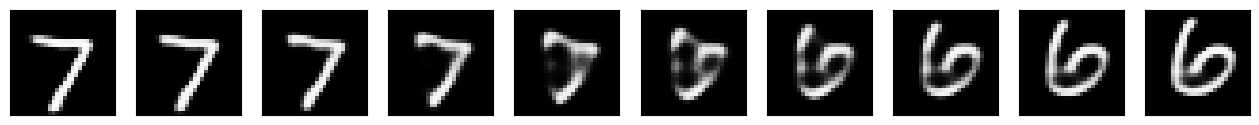

In [ ]:
_, axs = plt.subplots(nrows=1, ncols=interp_steps, figsize=(16, 4))
for label in range(0, interp_steps):
    figure = iterp_imgs[label].cpu().detach().numpy()
    figure = figure.reshape(28, 28)
    ax = axs[label]
    ax.imshow(figure, cmap="Greys_r", clim=(0, 1))
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False);

Чтобы увидеть более плавные изменения, можем сделать видео. Для этого можно использовать уже известный нам OpenCV. Он умеет делать видеофайлы из массивов чисел.

In [ ]:
from PIL import Image

interp_steps = 200
weight = torch.linspace(0, 1, steps=interp_steps)
interp = torch.lerp(
    latent_space1.repeat(interp_steps, 1),
    latent_space2.repeat(interp_steps, 1),
    weight=weight.view(-1, 1).to(device),
)
iterp_imgs = decoder(interp)

resize_coeff = 10
imgs = np.squeeze(iterp_imgs.cpu().detach().numpy())
size = (imgs.shape[1] * resize_coeff, imgs.shape[2] * resize_coeff)


imgs = [
    Image.fromarray(np.uint8(img * 255)).resize(size).convert("RGB") for img in imgs
]
imgs[0].save(
    "ae_img.gif",
    save_all=True,
    append_images=imgs[1:],
    optimize=False,
    duration=40,
    loop=0,
)

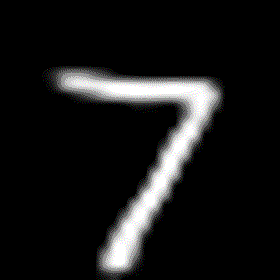

In [ ]:
from IPython.display import Image as iImage

iImage(open("ae_img.gif", "rb").read())

Так себе интерполяция вышла. Старое изображение затухает, а новое изображение появляется. Хочется, чтобы в промежуточных кадрах не было каких-то непонятных очертаний, а изображение было чем-то промежуточным по смыслу между стартовым и конечным изображением.

Причина неудачи в том, что в в результате обучения в латентном пространстве возникли зоны, которые умеют декодироваться в хорошие изображения. Но совсем не обязательно между этими зонами будет что-то адекватное (что мы видели из представления).

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/autoencoder_as_generator_problem.png" alt="alttext" width="500">

Представим это графически. Пусть наш очень умный, содержащий очень много коэффициентов автоэнкодер смог разложить все входные объекты на одной оси (размерность латентного пространства — 1). По сути он каждому входному изображению присвоил номер, и по номеру может это изображение вспомнить. То есть автоэнкодер очень переобученный. Тогда если мы возьмём промежуточный номер (пытаемся интерполировать), то какое изображение мы собираемся получить?

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/autoencoder_as_generator_problem_explanation.png" alt="alttext" width="950">

Если мы хотим, чтобы декодированные промежуточные латентные состояния имели черты близких к ним объектов, то надо притянуть латентные координаты похожих объектов. Например, вот так:


<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/irregular_and_regular_latent_space.png" alt="alttext" width="950">

# Вариационные автоэнкодеры (VAE)

Мотивация:

Хотим вместо представления слева получить представление справа:

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/latent_space_with_and_witout_regularization.png" alt="alttext" width="850">



При этом зоны пересечения должны действительно содержать переходные картины:



<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/vae_latent_space.png" alt="alttext" width="400">


#### Решение с помощью регуляризации

Можем попробовать заставить наши объекты «лежать» рядом — будем штрафовать латентные представления, которые далеко уходят от начала координат.

Можем использовать как отдельно L1 или L2 регуляризацию, так и их комбинацию — elastic loss.

Однако это приведет просто к масштабированию распределения. Нам надо одновременно получить связное латентное представление, чтобы у нас не возникало зон в латентном представлении, которым не соответствует ничего, и при этом представление, в котором цифры будут отделены друг от друга.

<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L13/reconstruction_loss_only.png" alt="alttext" width="400"></center>

<center><em>Source: <a href="https://www.jeremyjordan.me/variational-autoencoders/">Variational Autoencoders</a></em></center>

Если переход-интерполяция между объектами проходит через зону отсутствующих в обучении объектов, то их декодирование даст несуществующие в реальности объекты. Нам не удастся погенерировать новые картинки, преобразовывая случайную точку из латентного пространства в случайную картинку.


## Реализация вариационного автоэнкодера

Постановка задачи с автоэнкодером говорит нам, что существует некое пространство меньшей размерности $Z$, которое и обуславливает процесс генерации объектов из $X$. Все остальные различия — следствия случайности: один и тот же человек может по-разному нарисовать цифру 5.

Будем искать латентное пространство $Z$, которое удовлетворяет следующему условию:

$$\large p(x) = \int p(x, z)dz $$

Кроме того, пусть объекты из $Z$ легко генерировать.

По формуле совместной вероятности:

$$\large p(x, z) = p(x|z)p(z) $$

Осталось только подобрать такие параметры, чтобы все работало.



К сожалению, сделать это в таком виде не получится. Пространство $X$ может быть высокоразмерным.

Но мы можем существенно сузить область поиска, ведь каждому $x$ из пространства $X$ соответствует лишь небольшая возможная область в $Z$.

Для этого будем также учить отображение из пространства $X$ в пространство $Z$, т. е. пытаться выучить $p(z|x)$. Назовем функцию, которой будем его приближать, $q(z|x)$.

Что же в случае автоэнкодера выполняет роль $p(x|z)$ и $q(z|x)$?
Очевидно, кодировщик и декодировщик соответственно.


<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/vae_as_two_functions.png" alt="alttext" width="850">


Чтобы все получилось, нужно сделать с кодировщиком две вещи. Заметьте, что декодировщик мы оставим без изменений.

### Первая модификация

Пусть наш кодировщик генерирует на основе объекта $X$ вектор средних и вектор стандартных отклонений.

Этих двух векторов хватает нам для того, чтобы задать многомерное нормальное распределение с независимыми компонентами (чтобы матрица ковариаций была диагональной), соответствующее данному объекту.

Чтобы получить латентное представление объекта, отличающегося от $X$ только в силу случайности, нам достаточно сгенерировать вектор из нормального распределения с такими параметрами.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/vae_architecture_first_modification.png" alt="alttext" width="850">

Далее мы можем требовать, чтобы из полученного латентного представления декодировшик восстанавливал объект, похожий на исходный.

#### Reparametrization trick

Здесь, однако, сразу возникает проблема с тем, что граф вычислений, соответствующий предыдущей структуре, не может пропускать градиент — как пропустить градиент через генератор случайного нормального числа? Если считать из определения, то даже малейшему изменению параметра могут соответствовать бесконечные изменения генерируемого числа (нормальное распределение определено на бесконечности).

Но мы можем вспомнить замечательное свойство одномерного нормального распределения:

$$\large N(\mu,\sigma^2) = N(0,1) * \sigma + \mu$$

Выполняется это и для многомерного случая. Потому сделаем следующее: будем генерировать значение из нормального распределения со средними 0 и дисперсиями 1, а затем домножать это на вектор стандартных отклонений и прибавлять вектор средних. Получится вот такое преобразование, которое называется **reparametrization trick**.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/reparametrization_trick.png" width="900">



В отличие от левого случая, в правом мы спокойно можем пропустить градиент через детерминистичные ноды.


Но такой принцип также имеет проблему предыдущего детерминистического подхода, так как вероятностное распределение сможет свернуться в дельта-функцию — зачем нейросети мучиться с объектами, немного отличающимися от тех, что есть в обучающей выборке, и пытаться нормально их восстанавливать, если можно просто начать генерировать стандартные отклонения, близкие к нулю, и тем самым получить $\delta$-функцию, которая будет нашему объекту всегда сопоставлять одну точку в латентном представлении.


<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/Dirac_function_approximation.gif" alt="alttext" width="240">


### Вторая модификация

Поэтому нам надо ввести регуляризацию, требующую от каждого распределения быть близким к нормальному распределению вокруг нуля координат латентного пространства с дисперсией 1 (наше $P(z)$).

Для этого нам нужна некая мера расстояния между двумя вероятностными распределениями. В базовом случае в качестве такой меры расстояния используется **дивергенция Кульбака-Лейблера**, или KL-дивергенция.

#### Дивергенция Кульбака-Лейблера

[Дивергенция Кульбака-Лейблера](https://ru.wikipedia.org/wiki/Расстояние_Кульбака_—_Лейблера) между двумя вероятностными распределениями $P$ и $Q$ определяется следующим образом:

$$\large KL(P||Q) = \int_X p(x)\log \dfrac {p(x)} {q(x)} dx$$

В теории информации $p$ считается целевым (истинным) распределением, а $q$ — тем, с которым мы его сравниваем (проверяемым).
Важно понимать, что $KL$ не является мерой расстояния, т.к. в общем случае

$$\large KL(P||Q) \neq KL(Q||P)$$.

#### Только KL-дивергенция

Чтобы распределение $Q(z|x)$ в латентном пространстве $Z$ походило на нормальное, мы будем минимизировать KL-дивергенцию между ним и стандартным нормальным распределением $N(0,1)$.

$$\large Loss =  KL(Q(z|x)||N(0,1)) $$

Данное выражение может быть [записано аналитически](https://stats.stackexchange.com/questions/318748/deriving-the-kl-divergence-loss-for-vaes):


$$\large KL(N(\mu, \sigma) || N(0, 1)) = -\frac {1} {2}(\log {\sigma^2} - \sigma^2 - \mu^2 + 1)$$


<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L13/pure_kl_loss.png" alt="alttext" width="400"></center>

<center><em>Source: <a href="https://www.jeremyjordan.me/variational-autoencoders/">Variational Autoencoders</a></em></center>

Видим, что мы забываем про декодировщик — он может выдавать все, что угодно. Потому логично ожидать, что обучится только кодировщик, и обучится он отражать наши точки в нормальное распределение со средним 0 и дисперсией 1. Можем проверить это.

In [ ]:
torch.manual_seed(42)


class VAEEncoder(Encoder):
    def __init__(self, latent_dim):
        if latent_dim % 2 != 0:  # check for the parity of the latent space
            raise Exception("Latent size for VAEEncoder must be even")
        super().__init__(latent_dim)


def vae_split(latent):
    size = latent.shape[1] // 2  # divide the latent representation into mu and log_var
    mu = latent[:, :size]
    log_var = latent[:, size:]
    return mu, log_var


def vae_reparametrize(mu, log_var):
    sigma = torch.exp(0.5 * log_var)
    eps = torch.randn(mu.shape[0], mu.shape[1]).to(device)logvar_init
    return eps * sigma + mu


def vae_pass_handler(encoder, decoder, data, *args, **kwargs):
    latent = encoder(data)
    mu, log_var = vae_split(latent)
    sample = vae_reparametrize(mu, log_var)
    recon = decoder(sample)
    return latent, recon


def kld_loss(mu, log_var):
    var = log_var.exp()
    kl_loss = torch.mean(-0.5 * torch.sum(log_var - var - mu**2 + 1, dim=1), dim=0)
    return kl_loss


def kl_loss_handler(data, recon, latent, kld_weight=0.1, *args, **kwargs):
    mu, log_var = vae_split(latent)
    kl_loss = kld_loss(mu, log_var)
    return kld_weight * kl_loss

Обучим VAE

In [ ]:
torch.manual_seed(42)

latent_dim = 2

learning_rate = 1e-4
encoder = VAEEncoder(latent_dim=latent_dim * 2)
decoder = Decoder(latent_dim=latent_dim)


encoder = encoder.to(device)
decoder = decoder.to(device)

optimizer = optim.Adam(
    chain(encoder.parameters(), decoder.parameters()), lr=learning_rate
)
for i in range(1, 3):
    train(
        encoder=encoder,
        decoder=decoder,
        optimizer=optimizer,
        loader=train_loader,
        epoch=i,
        single_pass_handler=vae_pass_handler,
        loss_handler=kl_loss_handler,
        log_interval=450,
    )

Train Epoch: 1 [0/60000 (0%)]            Loss: 0.027355
Train Epoch: 1 [28800/60000 (48%)]       Loss: 0.000234
Train Epoch: 1 [57600/60000 (96%)]       Loss: 0.000071
Train Epoch: 2 [0/60000 (0%)]            Loss: 0.000074
Train Epoch: 2 [28800/60000 (48%)]       Loss: 0.000038
Train Epoch: 2 [57600/60000 (96%)]       Loss: 0.000041


In [ ]:
encoder = encoder.eval()
decoder = decoder.eval()

In [ ]:
run_res = run_eval(encoder, decoder, test_loader, vae_pass_handler)

In [ ]:
mu, log_var = vae_split(run_res["latent"])
var = np.exp(log_var)

Все генерируемые средние почти неотличимы от нуля

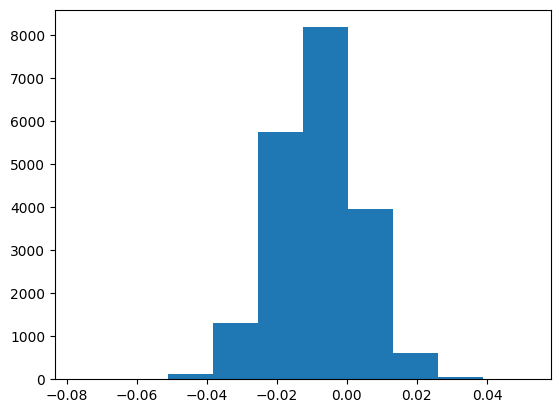

In [ ]:
plt.hist(mu.ravel())
plt.show()

Все генерируемые дисперсии почти неотличимы от 1

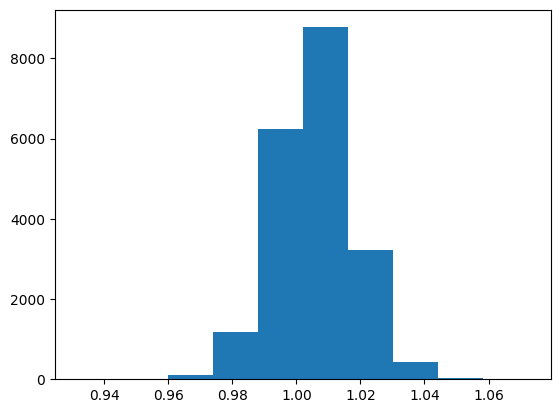

In [ ]:
plt.hist(var.ravel());

В результате получили практически неразделимые объекты:

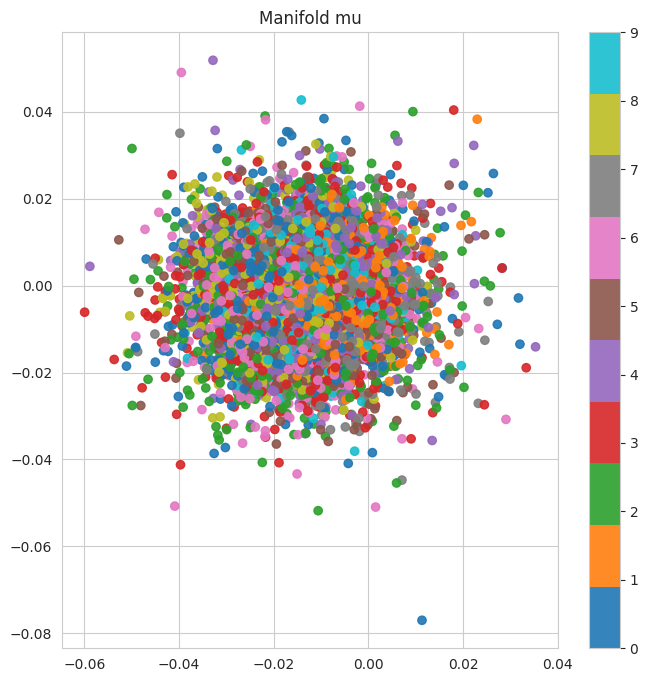

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")

pal = sns.color_palette("Paired", n_colors=10)
plot_manifold(mu, run_res["labels"], title="Manifold mu")

#### Совмещаем ошибку восстановления и KL-дивергению

Поэтому мы должны сохранить исходный loss — декодировщик штрафуется за то, что не может нормально реконструировать объект.

Формально это записывается следующим образом:

$$\large vae\_loss = E_{z \sim Q(z|x)}[logP(x|z)] + KL[Q(z|x)||N(0,1)]$$

А в итоге:

$$\large vae\_loss = BCE(x , \tilde{x}) -\frac {1} {2}(\log {\sigma^2} - \sigma^2 - \mu^2 + 1)$$



Вторая компонента осталась без изменений, а первая — это красиво записанное требование корректно восстанавливать объекты из обучающей выборки, чтобы при этом объекты, полученные их небольшим изменением за счет случайности, также восстанавливались в объекты, близкие к объектам из тренировочной выборки. И удовлетворять этой компоненте loss мы можем за счет того же loss, который использовали в обычном автоэнкодере.

Учет обеих компонент позволяет нам получить то, что мы хотели — непрерывное пространство, где нет «дыр» в представлении, и при этом близкие по смыслу объекты расположены рядом, а далекие — далеко.

<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L13/kl_repr_loss.png" alt="alttext" width="400"></center>

<center><em>Source: <a href="https://www.jeremyjordan.me/variational-autoencoders/">Variational Autoencoders</a></em></center>

Напишем наш новый loss:

In [ ]:
def vae_loss_handler(data, recon, latent, kld_weight=0.005, *args, **kwargs):
    mu, log_var = vae_split(latent)
    kl_loss = kld_loss(mu, log_var)
    # add bce loss(reconstruction)
    loss = F.binary_cross_entropy(recon, data) + kld_weight * kl_loss
    return loss

Теперь обучим наш VAE:

In [ ]:
torch.manual_seed(42)

latent_dim = 2

learning_rate = 1e-4
encoder = VAEEncoder(latent_dim=latent_dim * 2)
decoder = Decoder(latent_dim=latent_dim)


encoder = encoder.to(device)
decoder = decoder.to(device)

optimizer = optim.Adam(
    chain(encoder.parameters(), decoder.parameters()), lr=learning_rate
)
for i in range(1, 6):
    train(
        encoder=encoder,
        decoder=decoder,
        optimizer=optimizer,
        loader=train_loader,
        epoch=i,
        single_pass_handler=vae_pass_handler,
        loss_handler=vae_loss_handler,
        log_interval=450,
    )

Train Epoch: 1 [0/60000 (0%)]            Loss: 0.848170
Train Epoch: 1 [28800/60000 (48%)]       Loss: 0.223265
Train Epoch: 1 [57600/60000 (96%)]       Loss: 0.217001
Train Epoch: 2 [0/60000 (0%)]            Loss: 0.206945
Train Epoch: 2 [28800/60000 (48%)]       Loss: 0.215345
Train Epoch: 2 [57600/60000 (96%)]       Loss: 0.209484
Train Epoch: 3 [0/60000 (0%)]            Loss: 0.206822
Train Epoch: 3 [28800/60000 (48%)]       Loss: 0.207551
Train Epoch: 3 [57600/60000 (96%)]       Loss: 0.221646
Train Epoch: 4 [0/60000 (0%)]            Loss: 0.216063
Train Epoch: 4 [28800/60000 (48%)]       Loss: 0.196483
Train Epoch: 4 [57600/60000 (96%)]       Loss: 0.204343
Train Epoch: 5 [0/60000 (0%)]            Loss: 0.206879
Train Epoch: 5 [28800/60000 (48%)]       Loss: 0.211418
Train Epoch: 5 [57600/60000 (96%)]       Loss: 0.211934


In [ ]:
encoder = encoder.eval()
decoder = decoder.eval()

In [ ]:
run_res = run_eval(encoder, decoder, test_loader, vae_pass_handler)

In [ ]:
mu, log_var = vae_split(run_res["latent"])

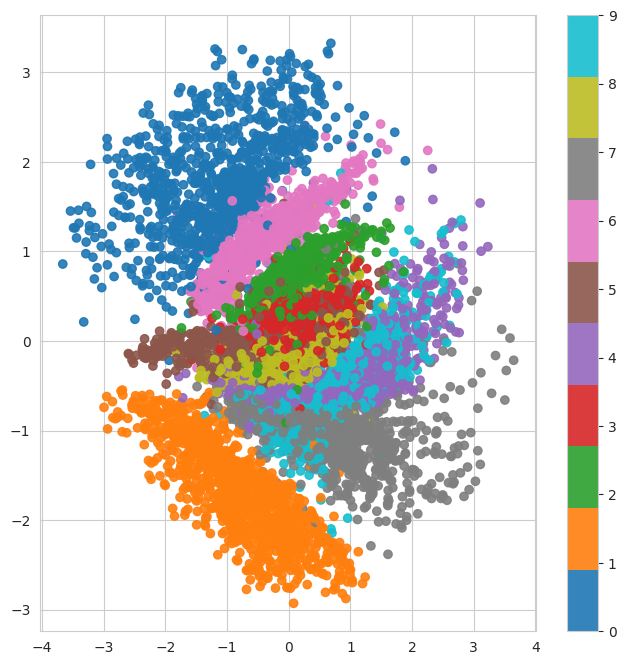

In [ ]:
pal = sns.color_palette("Paired", n_colors=10)
plot_manifold(mu, run_res["labels"])

Видим, что цифры разделились в пространстве, но при этом жмутся друг к другу. При этом, что интересно, 4 и 9 почти неотличимы. Это можно объяснить тем, что двух компонент недостаточно, чтобы разделить настолько похожие цифры (по сути, все отличие в заполненности области между двумя рожками 4).

Посмотрим, как теперь получится интерполировать между 7 и 6. Для сравнения с результатом, полученным обычным автоэнкодером, возьмем latent space такого же размера, как у него (24).

In [ ]:
torch.manual_seed(42)

latent_dim = 24
learning_rate = 1e-4

encoder = VAEEncoder(latent_dim=latent_dim * 2)
decoder = Decoder(latent_dim=latent_dim)

encoder = encoder.to(device)
decoder = decoder.to(device)

optimizer = optim.Adam(
    chain(encoder.parameters(), decoder.parameters()), lr=learning_rate
)
for i in range(1, 6):
    train(
        encoder=encoder,
        decoder=decoder,
        optimizer=optimizer,
        loader=train_loader,
        epoch=i,
        single_pass_handler=vae_pass_handler,
        loss_handler=vae_loss_handler,
        log_interval=450,
    )

Train Epoch: 1 [0/60000 (0%)]            Loss: 0.620591
Train Epoch: 1 [28800/60000 (48%)]       Loss: 0.213971
Train Epoch: 1 [57600/60000 (96%)]       Loss: 0.202555
Train Epoch: 2 [0/60000 (0%)]            Loss: 0.192386
Train Epoch: 2 [28800/60000 (48%)]       Loss: 0.195283
Train Epoch: 2 [57600/60000 (96%)]       Loss: 0.188361
Train Epoch: 3 [0/60000 (0%)]            Loss: 0.190172
Train Epoch: 3 [28800/60000 (48%)]       Loss: 0.193771
Train Epoch: 3 [57600/60000 (96%)]       Loss: 0.177115
Train Epoch: 4 [0/60000 (0%)]            Loss: 0.186943
Train Epoch: 4 [28800/60000 (48%)]       Loss: 0.185550
Train Epoch: 4 [57600/60000 (96%)]       Loss: 0.179029
Train Epoch: 5 [0/60000 (0%)]            Loss: 0.185708
Train Epoch: 5 [28800/60000 (48%)]       Loss: 0.178904
Train Epoch: 5 [57600/60000 (96%)]       Loss: 0.185438


In [ ]:
encoder = encoder.eval()
decoder = decoder.eval()

In [ ]:
imgs, labels = next(iter(test_loader))
latent_space1_mu, _ = vae_split(encoder(imgs[labels == 7][0:1].to(device)))
latent_space2_mu, _ = vae_split(encoder(imgs[labels == 6][0:1].to(device)))

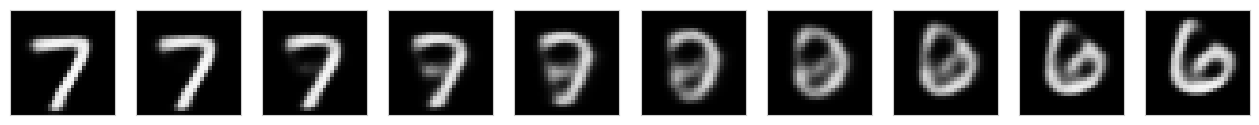

In [ ]:
interp_steps = 10
weight = torch.linspace(0, 1, steps=interp_steps)
interp = torch.lerp(
    latent_space1_mu.repeat(interp_steps, 1),
    latent_space2_mu.repeat(interp_steps, 1),
    weight=weight.view(-1, 1).to(device),
)
iterp_imgs = decoder(interp)
_, axs = plt.subplots(nrows=1, ncols=interp_steps, figsize=(16, 4))
for label in range(0, interp_steps):
    figure = iterp_imgs[label].cpu().detach().numpy()
    figure = figure.reshape(28, 28)
    ax = axs[label]
    ax.imshow(figure, cmap="Greys_r", clim=(0, 1))
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False);

Видим плавную интерполяцию. Посмотрим на примере с видео.

In [ ]:
from PIL import Image

interp_steps = 200
weight = torch.linspace(0, 1, steps=interp_steps)
interp = torch.lerp(
    latent_space1_mu.repeat(interp_steps, 1),
    latent_space2_mu.repeat(interp_steps, 1),
    weight=weight.view(-1, 1).to(device),
)
iterp_imgs = decoder(interp)


resize_coeff = 10
imgs = np.squeeze(iterp_imgs.cpu().detach().numpy())
size = (imgs.shape[1] * resize_coeff, imgs.shape[2] * resize_coeff)


imgs = [
    Image.fromarray(np.uint8(img * 255)).resize(size).convert("RGB") for img in imgs
]
imgs[0].save(
    "vae_img.gif",
    save_all=True,
    append_images=imgs[1:],
    optimize=False,
    duration=40,
    loop=0,
)

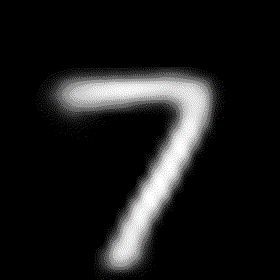

In [ ]:
from IPython.display import Image as iImage

iImage(open("vae_img.gif", "rb").read())

Все переходы понятны, и в процессе не возникает невозможных цифр.

Если мы используем размерность латентного пространства 2, то это позволит нам получать распределение классов цифр на плоскости, типа такого:


<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L13/vae_sampling.png" alt="alttext" width="350">

<em>Source: <a href="https://habr.com/ru/articles/331552/">Автоэнкодеры в Keras, Часть 3: Вариационные автоэнкодеры (VAE)</a></em>



Это не просто интерполяция по двум направлениям. Тут именно все 10 цифр должны так занять место на плоскости, чтобы плавно перетекать друг в друга.

Проверим наконец, что вариационный автоэнкодер работает как автоэнкодер и может, к примеру, убирать шум.

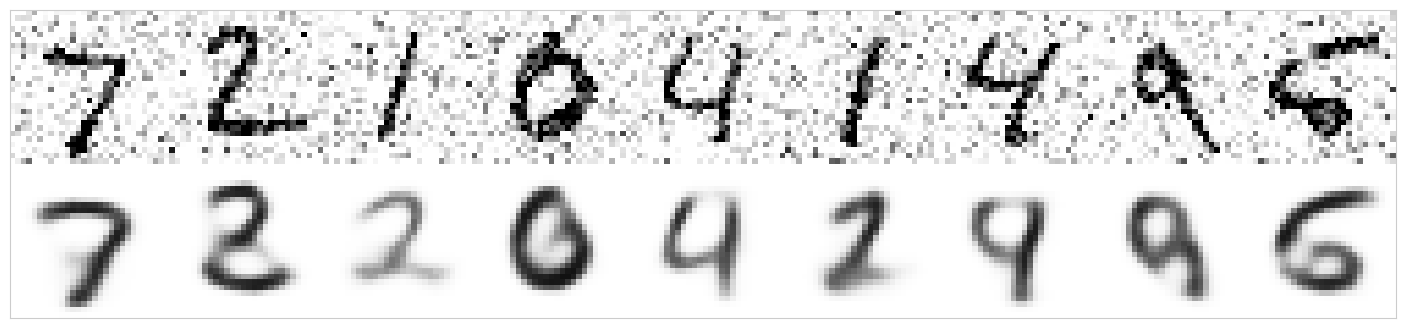

In [ ]:
run_res = run_eval(encoder, decoder, test_noised_loader, vae_pass_handler)
plot_samples(run_res["real"][0:9], run_res["recon"][0:9])

Видим, что VAE работает. Пусть не лучше, чем обычный автоэнкодер, возможно, даже хуже. Можно добиться улучшения его работы, поставив меньший вес KL-дивергенции и увеличив латентное пространство.

Аналогично посмотрим, как он восстанавливает изображения

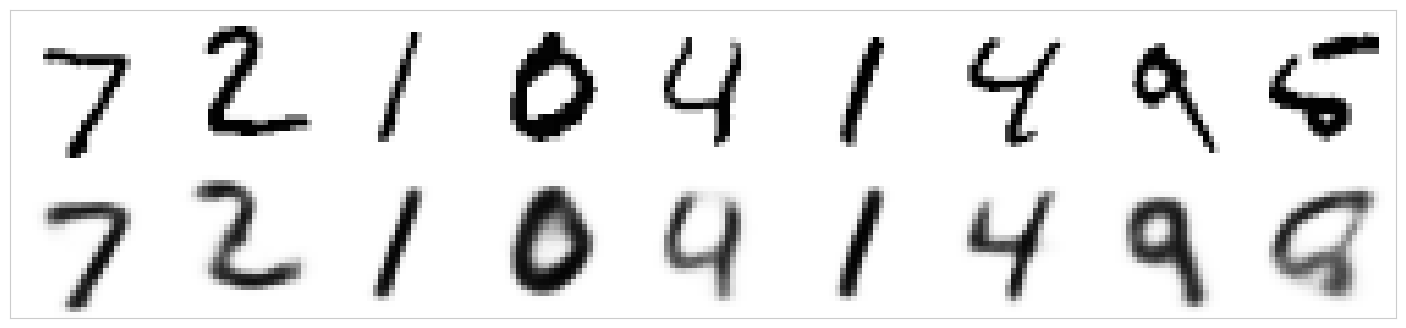

In [ ]:
run_res = run_eval(encoder, decoder, test_loader, vae_pass_handler)
plot_samples(run_res["real"][0:9], run_res["recon"][0:9])

Работает, но изображения получаются "размытыми". Это следствие сэмплирования из нормального распределения.

### Векторная арифметика

В принципе, можно даже в латентном пространстве брать разницу черт написания двух одинаковых цифр, прибавлять к другой цифре, получая в результате цифру, написанную немного по-другому.


Такое можно делать и для других примеров — добавлять людям на изображении очки.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/vector_arithmetic_add_new_property.png" alt="alttext" width="400">

или получать нечто среднее между двумя объектами.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/vector_arithmetic_get_half_property.png" alt="alttext" width="400">

Подробнее:

У нас есть 1, написанная без наклона, и 1, написанная с наклоном.
И у нас есть 9 без наклона.

Вычитаем из девятки единицу без наклона и прибавляем единицу с наклоном. Если все пройдет хорошо, получим девятку с наклоном.





<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L13/vector_arithmetic_example.png" alt="alttext" width="550">

<em>Source: <a href="https://blog.otoro.net/2016/04/01/generating-large-images-from-latent-vectors/#:~:text=First%2C%20let%E2%80%99s%20get,the%20autoencoded%20version">Generating Large Images from Latent Vectors</a></em>




Попробуем это сделать сами

In [ ]:
imgs, labels = next(iter(test_loader))
real_9_straight = imgs[labels == 9][6:7]  # find some straight "nine"
real_1_straight = imgs[labels == 1][3:4]  # find some straight "one"
real_1_tilted = imgs[labels == 1][0:1]    # find some tilted "one"


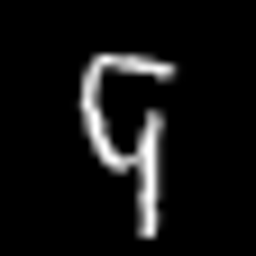

In [ ]:
size = (256, 256)
Image.fromarray(np.uint8(np.squeeze(real_9_straight.numpy()) * 255)).resize(size)

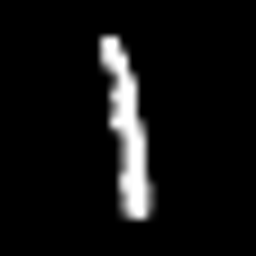

In [ ]:
Image.fromarray(np.uint8(np.squeeze(real_1_straight.numpy()) * 255)).resize(size)

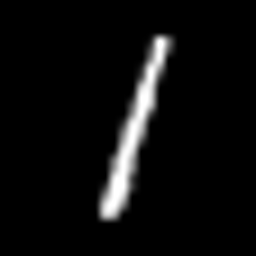

In [ ]:
Image.fromarray(np.uint8(np.squeeze(real_1_tilted.numpy()) * 255)).resize(size)

In [ ]:
latent_9_straight, _ = vae_split(encoder(real_9_straight.to(device)))
latent_1_straight, _ = vae_split(encoder(real_1_straight.to(device)))
latent_1_tilted, _ = vae_split(encoder(real_1_tilted.to(device)))


In [ ]:
latent_9_tilted = latent_9_straight - latent_1_straight + latent_1_tilted
gen_9_tilted = decoder(latent_9_tilted)

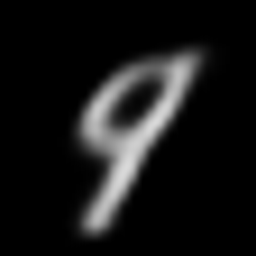

In [ ]:
Image.fromarray(np.uint8(np.squeeze(gen_9_tilted.cpu().detach().numpy()) * 255)).resize(size)

Удалось перенести наклон единицы на девятку. Получилось неплохо, однако простой VAE не гарантирует того, что "фокус удастся". Для получения возможности использовать векторную арифметику могут применяться специальные функции потерь и архитектуры.

## Проблемы  «ванильного» VAE

Одна из проблем VAE, с которой можно столкнуться, состоит в том, что две компоненты функции потерь конфликтуют друг с другом. Если будет доминировать KL-loss, то мы получим представление, из которого наши объекты очень плохо восстанавливаются — они раскиданы по представлению, как угодно.

Если же, наоборот, будет доминировать reconstruction loss, то мы получим ситуацию, в которой объекты восстанавливаются нормально, однако в латентном пространстве есть пустоты.

Проблема возникает и с самой KL-дивергенцией, у которой есть ряд существенных недостатков. Есть другие способы оценки близости двух распределений, которые порой дают лучшие результаты. К ним относится дивергенция Йенсена — Шеннона, которую мы вскользь затронем далее, и метрика Вассерштейна (используется в Wasserstein autoencoders), изучение которой выходит за рамки курса.

Кроме того, в случае, когда декодировщик содержит значительно больше параметров, нежели кодировщик, может возникать ситуация, при которой сгенерированное латентное представление игнорируется.

## Автоэнкодеры с условием (CAE)

### Мотивация

Как, используя обычный VAE, сгенерировать картинку с заданной меткой?

На самом деле, задача нетривиальна. Как вариант, мы можем понять, в какую область латентного пространства VAE отображает все 0, и затем сэмплировать уже из этой области.

Хорошо, а если мы хотим нарисовать единицу тем же почерком, которым нарисована данная нам тройка? В этом случае классический VAE вообще не получится использовать.

Есть еще одна проблема. Если распределение объектов действительно сильно зависит от какой-то дополнительной информации, например, того, какую цифру хотел изобразить человек, то KL-loss будет пытаться «скрестить ежа с ужом», и в результате мы получим очень странное представление, а на границах могут получаться несуществующие в реальности мутанты (если внимательно посмотрите на предыдущую картинку — так и получается).

### Несвязные компоненты и автокодировщик с условиями

Продемонстрировать мы это можем на модельной задаче. Сгенерируем два несвязных набора точек в двумерном пространстве, каждый из которых представляет собой некий паттерн с добавленным шумом.

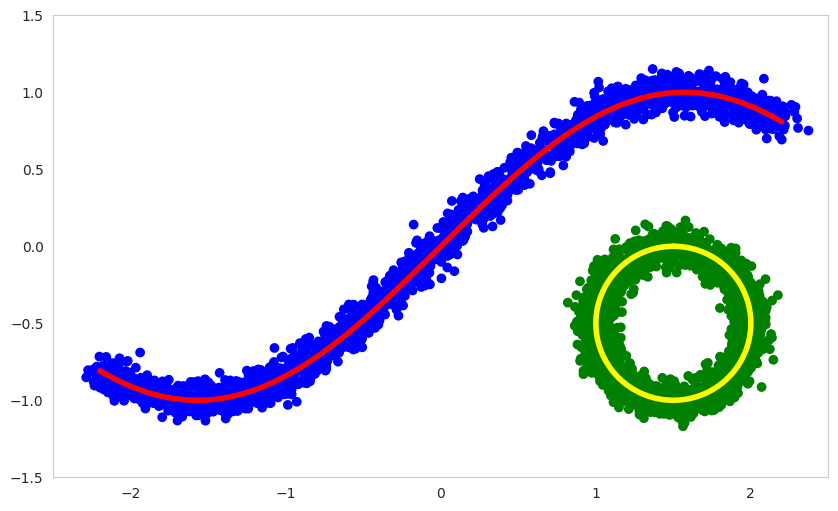

In [ ]:
np.random.seed(42)

# create dataset
x1 = np.linspace(-2.2, 2.2, 2000)
fx = np.sin(x1)
dots1 = np.vstack([x1, fx]).T

t = np.linspace(0, 2 * np.pi, num=2000)
dots2 = 0.5 * np.array([np.sin(t), np.cos(t)]).T + np.array([1.5, -0.5])[None, :]

dots = np.vstack([dots1, dots2])
noise = 0.06 * np.random.randn(*dots.shape)

labels = np.array([0] * x1.shape[0] + [1] * t.shape[0])
noised = dots + noise


# Visualization
colors = ["b"] * x1.shape[0] + ["g"] * t.shape[0]
plt.figure(figsize=(10, 6))
plt.xlim([-2.5, 2.5])
plt.ylim([-1.5, 1.5])
plt.scatter(noised[:, 0], noised[:, 1], c=colors)
plt.plot(dots1[:, 0], dots1[:, 1], color="red", linewidth=4)
plt.plot(dots2[:, 0], dots2[:, 1], color="yellow", linewidth=4)
plt.grid(False)

Напишем простой автоэнкодер на полносвязных слоях:

In [ ]:
class SimpleEncoderDecoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(2, 32),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Linear(32, 64),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Linear(64, 1),
        )
        self.decoder = nn.Sequential(
            nn.Linear(1, 64),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Linear(64, 32),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

В прошлых примерах мы этим пренебрегали, но автоэнкодер тоже может переобучаться. Поэтому сделаем разбиение на обучение и тест.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(noised, test_size=0.25, random_state=42)
x_train = torch.from_numpy(x_train).float()
x_test = torch.from_numpy(x_test).float()

Чтобы сильно не мучаться, поставим просто scheduler, который автоматически уменьшает learning rate нашей сети, если она переобучается или просто не улучшает качество на валидационном датасете.

In [ ]:
from tqdm.notebook import tqdm

torch.manual_seed(42)

encdec = SimpleEncoderDecoder()
optimizer = optim.Adam(encdec.parameters())
criterion = nn.MSELoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, "min", patience=50
)  # to optimize learning rate


for epoch in tqdm(range(5000)):
    optimizer.zero_grad()
    x_restored = encdec(x_train)
    loss = criterion(x_train, x_restored)
    loss.backward()
    if optimizer.param_groups[0]["lr"] < 10e-7:  # if learning step becomes too small
        print(epoch)
        break

    with torch.no_grad():
        x_restored = encdec(x_test)
        val_loss = criterion(x_test, x_restored)
    scheduler.step(val_loss)
    optimizer.step()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
print(val_loss)

tensor(0.0112)


In [ ]:
with torch.no_grad():
    x_restored = encdec(x_test)
    dots_restored = x_restored.numpy()

Посмотрим, что выучил автоэнкодер. Видим, что он показывает связь там, где она явно отсутствует. Требование получить одно и то же представление для точек из двух паттернов мешает автоэнкодеру нормально выучить эти паттерны — они получаются смазанными или даже неверными.


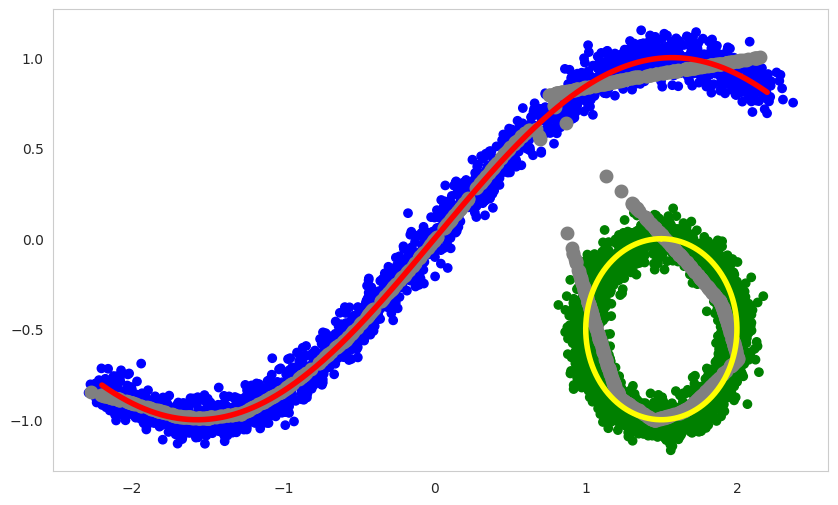

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dots1[:, 0], dots1[:, 1], color="red", linewidth=4)
plt.plot(dots2[:, 0], dots2[:, 1], color="yellow", linewidth=4)
plt.scatter(noised[:, 0], noised[:, 1], c=colors)
plt.scatter(dots_restored[:, 0], dots_restored[:, 1], color="grey", linewidth=4)
plt.grid(False)

Видим, что наш автоэнкодер восстанавливает часть объектов в область, где ничего нет. Потому что у него нет возможности понять, что это две несвязные компоненты.

А что будет, если мы будем передавать в кодировщик и в декодировщик метку объекта?
Тогда окажется, что наш автокодировщик работает в разы лучше:


In [ ]:
class SimpleConditionalEncoderDecoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3, 32),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Linear(32, 64),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Linear(64, 1),
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 64),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Linear(64, 32),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Linear(32, 2),
        )

    def forward(self, x, y):
        x = torch.cat(
            [x, y.view(-1, 1)], dim=1
        )  # combine the labels with X, change the dimension of the labels
        z = self.encoder(x)
        x = torch.cat([z, y.view(-1, 1)], dim=1)
        x = self.decoder(x)
        return x

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    noised, labels, test_size=0.25, random_state=42
)
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).float()

In [ ]:
torch.manual_seed(42)

encdec = SimpleConditionalEncoderDecoder()
optimizer = optim.Adam(encdec.parameters())
criterion = nn.MSELoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, "min", patience=50)


for epoch in tqdm(range(5000)):
    optimizer.zero_grad()
    x_restored = encdec(x_train, y_train)
    loss = criterion(x_train, x_restored)
    loss.backward()
    if optimizer.param_groups[0]["lr"] < 10e-7:
        print(epoch)
        break

    with torch.no_grad():
        x_restored = encdec(x_test, y_test)
        val_loss = criterion(x_test, x_restored)
    scheduler.step(val_loss)
    optimizer.step()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
print(val_loss)

tensor(0.0053)


In [ ]:
with torch.no_grad():
    X_restored = encdec(x_test, y_test)
    dots_restored = X_restored.numpy()

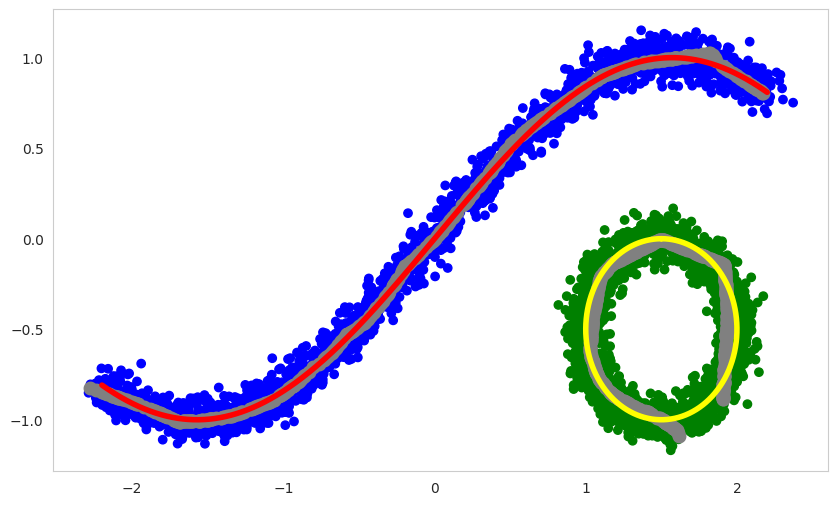

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dots1[:, 0], dots1[:, 1], color="red", linewidth=4)
plt.plot(dots2[:, 0], dots2[:, 1], color="yellow", linewidth=4)
plt.scatter(noised[:, 0], noised[:, 1], c=colors)
plt.scatter(dots_restored[:, 0], dots_restored[:, 1], color="grey", linewidth=4)
plt.grid(False)

Ситуация стала лучше. То, что мы применили, называется условными автоэнкодерами (Conditional AE). Конкретно — вместе с признаковым описанием объекта мы также передаем метки, которые указывают на то, что он относится к каким-то важным группам объектов, для которых, возможно, сети нужно учить отличное от других представление.

# Условные вариационные автоэнкодеры (CVAE)

## Реализация вариационного автоэнкодера с условиями, CVAE

Обычные автокодировщики с условиями применяются редко, так как они по-прежнему не гарантируют нам связность представления в пределах одной метки.

Однако добавление меток в вариационный автокодировщик часто помогает решать уже описанные задачи на хорошем уровне.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/cvae_scheme.png" alt="alttext" width="850">


Как подмешивать метку к изображению, чтобы передать это полностью свёрточной нейронной сети, не очевидно и обычно не нужно. Часто достаточно передавать метку только декодеру. Энкодер имеет в распоряжении изначальный объект и при желании может предсказать его метку сам.

Напишем код для CVAE. По сути надо поменять только декодер.

In [ ]:
class CDecoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()

        hidden_dims = [512, 256, 128, 64, 32]
        self.linear = nn.Linear(
            in_features=latent_dim + 10,  # add +10(num of labels) to latent space
            out_features=hidden_dims[0],
        )

        modules = []
        for i in range(len(hidden_dims) - 1):
            modules.append(
                nn.Sequential(
                    nn.ConvTranspose2d(
                        hidden_dims[i],
                        hidden_dims[i + 1],
                        kernel_size=3,
                        stride=2,
                        padding=1,
                        output_padding=1,
                    ),
                    nn.BatchNorm2d(hidden_dims[i + 1]),
                    nn.LeakyReLU(),
                )
            )

        modules.append(
            nn.Sequential(
                nn.ConvTranspose2d(
                    hidden_dims[-1],
                    hidden_dims[-1],
                    kernel_size=3,
                    stride=2,
                    padding=1,
                    output_padding=1,
                ),
                nn.BatchNorm2d(hidden_dims[-1]),
                nn.LeakyReLU(),
                nn.Conv2d(hidden_dims[-1], out_channels=1, kernel_size=7, padding=1),
                nn.Sigmoid(),
            )
        )

        self.decoder = nn.Sequential(*modules)

    def forward(self, x, lab):
        x = torch.cat([x, lab], dim=1)  # concatenate latent vector and label
        x = self.linear(x)
        x = x.view(-1, 512, 1, 1)
        x = self.decoder(x)
        return x

In [ ]:
def cvae_pass_handler(encoder, decoder, data, label, *args, **kwargs):
    latent = encoder(data)
    mu, log_var = vae_split(latent)
    sample = vae_reparametrize(mu, log_var)
    label = torch.nn.functional.one_hot(label, num_classes=10)  # labels to ohe
    recon = decoder(sample, label)
    return latent, recon

In [ ]:
torch.manual_seed(42)

latent_dim = 2

learning_rate = 1e-2
encoder = VAEEncoder(latent_dim=latent_dim * 2)
decoder = CDecoder(latent_dim=latent_dim)


encoder = encoder.to(device)
decoder = decoder.to(device)

optimizer = optim.Adam(
    chain(encoder.parameters(), decoder.parameters()), lr=learning_rate
)

for i in range(1, 6):
    train(
        encoder=encoder,
        decoder=decoder,
        optimizer=optimizer,
        loader=train_loader,
        epoch=i,
        single_pass_handler=cvae_pass_handler,
        loss_handler=vae_loss_handler,
        log_interval=450,
    )

Train Epoch: 1 [0/60000 (0%)]            Loss: 0.660004
Train Epoch: 1 [28800/60000 (48%)]       Loss: 0.200454
Train Epoch: 1 [57600/60000 (96%)]       Loss: 0.202574
Train Epoch: 2 [0/60000 (0%)]            Loss: 0.189119
Train Epoch: 2 [28800/60000 (48%)]       Loss: 0.182508
Train Epoch: 2 [57600/60000 (96%)]       Loss: 0.184041
Train Epoch: 3 [0/60000 (0%)]            Loss: 0.181480
Train Epoch: 3 [28800/60000 (48%)]       Loss: 0.190918
Train Epoch: 3 [57600/60000 (96%)]       Loss: 0.177304
Train Epoch: 4 [0/60000 (0%)]            Loss: 0.189897
Train Epoch: 4 [28800/60000 (48%)]       Loss: 0.174542
Train Epoch: 4 [57600/60000 (96%)]       Loss: 0.193535
Train Epoch: 5 [0/60000 (0%)]            Loss: 0.204862
Train Epoch: 5 [28800/60000 (48%)]       Loss: 0.195257
Train Epoch: 5 [57600/60000 (96%)]       Loss: 0.187902


In [ ]:
encoder = encoder.eval()
decoder = decoder.eval()

In [ ]:
run_res = run_eval(encoder, decoder, test_loader, cvae_pass_handler)

Добавив передачу метки в декодер, мы позволили автоэнкодеру отображать все цифры в "одно место". За счет этого ему легче стало учиться, loss стал чуть ниже.

При этом, если нарисовать латентное представление для всех наших цифр разом, получится комок, сосредоточенный в области нормального распределения. Это не значит, что оно плохое. Просто наша картина не учитывает, что нейросеть различает цифры теперь по меткам, а не по латентному представлению.

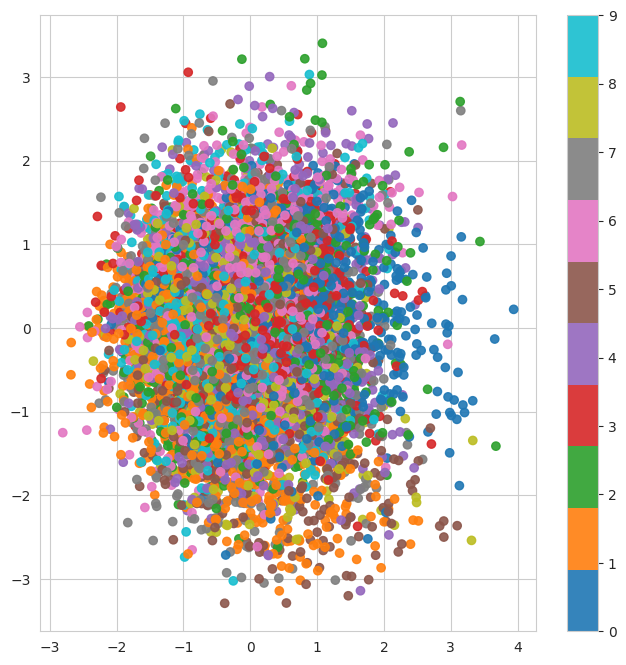

In [ ]:
plot_manifold(run_res["latent"], run_res["labels"])

Теперь у каждой цифры "свое" нормальное распределение.

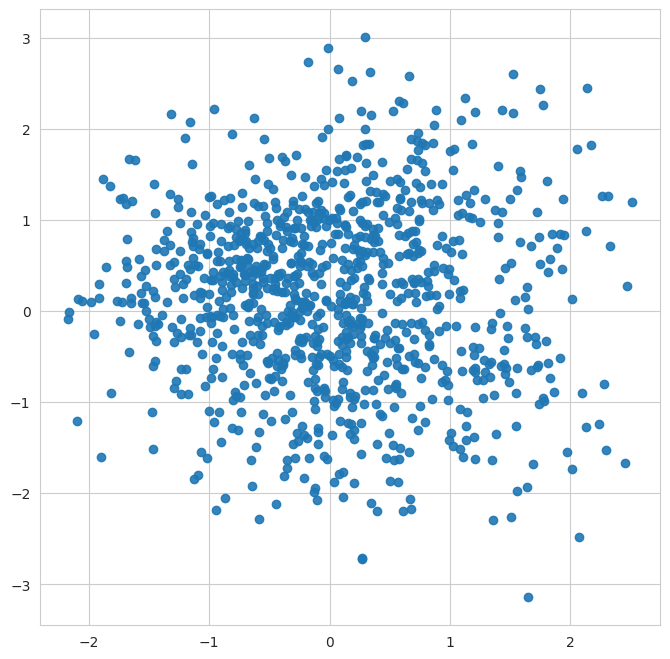

In [ ]:
plot_manifold(run_res["latent"][run_res["labels"] == 4])

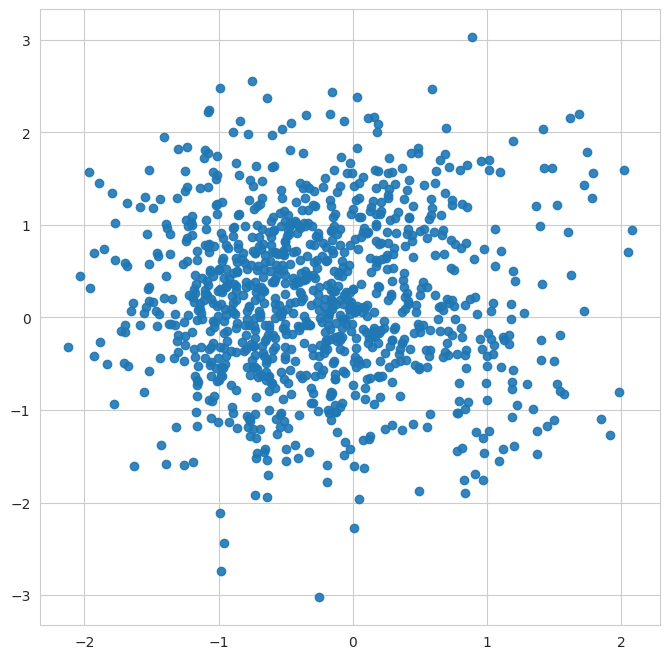

In [ ]:
plot_manifold(run_res["latent"][run_res["labels"] == 9])

### Генерация заданных цифр из латентного распределения

Посмотрим, как выглядит наше латентное представление, скажем, для четверок, которых мы до этого почти не видели (сливались с 9).

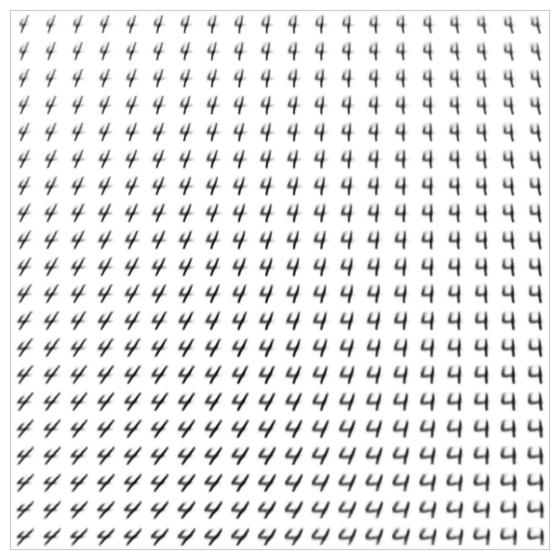

In [ ]:
steps = 20
space1 = torch.linspace(-2, 2, steps)
space2 = torch.linspace(-2, 2, steps)
grid = torch.cartesian_prod(space1, space2)
label = torch.full((grid.shape[0],), 4)
label = torch.nn.functional.one_hot(label, num_classes=10)
with torch.no_grad():
    imgs = decoder(grid.to(device), label.to(device))
    imgs = imgs.cpu().numpy().squeeze()

plot_samples(
    *[imgs[x : x + steps] for x in range(0, steps * steps, steps)], single_size=0.35
)

Видим, как у нас четверки плавно расположены по стилю.

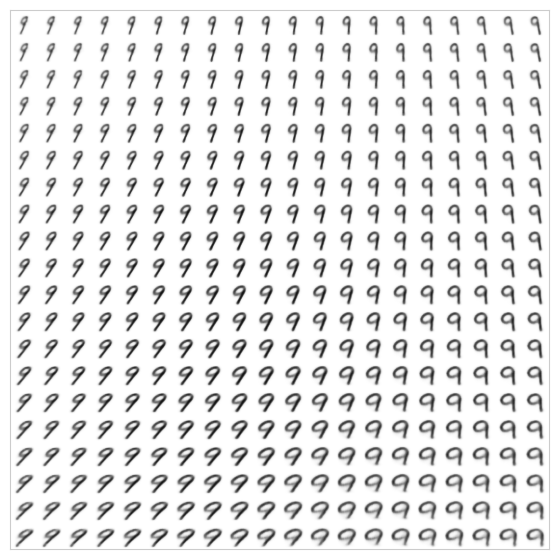

In [ ]:
steps = 20
space1 = torch.linspace(-2, 2, steps)
space2 = torch.linspace(-2, 2, steps)
grid = torch.cartesian_prod(space1, space2)
label = torch.full((grid.shape[0],), 9)
label = torch.nn.functional.one_hot(label, num_classes=10)
with torch.no_grad():
    imgs = decoder(grid.to(device), label.to(device))
    imgs = imgs.cpu().numpy().squeeze()

plot_samples(
    *[imgs[x : x + steps] for x in range(0, steps * steps, steps)], single_size=0.35
)

При желании можно посмотреть на процесс того, как нейросеть учит такие латентные представления.

Ниже показано, как нейросеть выполняет задачу генерации заданной цифры по мере обучения и как выглядит латентное представление объектов, относящихся к данной цифре (для примера взята семерка).

<table><tr>
<td> <img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L13/gen_cvae_7.gif" alt="alttext" style="width: 400px;"/> </td>
<td> <img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L13/lat_cvae_7.gif" alt="alttext" style="width: 400px;"/> </td>
</tr></table>

<em>Source: <a href="https://habr.com/ru/articles/331664/">Автоэнкодеры в Keras, Часть 4: Conditional VAE</a></em>

### Генерация заданных цифр с переносом стиля

Также успешно такая нейросеть справится в задаче, где мы используем латентное представление одной цифры  для того, чтобы сгенерировать цифру с таким же стилем написания.

Чтобы сделать это, достаточно просто получить латентное представление для 7, а затем передать его в декодер с меткой 3.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/generation_indicated_digits_from_latent_space.png" width="850">


Результаты переноса стилей для нескольких разных 7 представлены ниже.



<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L13/style_transfer_7.png" alt="alttext" width="500">

<em>Source: <a href="https://habr.com/ru/articles/331664/">Автоэнкодеры в Keras, Часть 4: Conditional VAE</a></em>

Сделаем то же самое для наших двоек и пятерок.
Выберем двойку и сгенерим несколько 5 с ее стилем

In [ ]:
imgs, labels = next(iter(test_loader))
real = imgs[labels == 2][1:2]

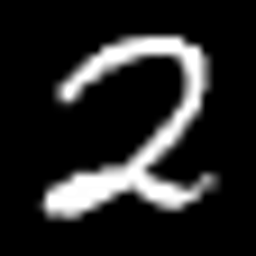

In [ ]:
size = (256, 256)
Image.fromarray(np.uint8(np.squeeze(real.numpy()) * 255)).resize(size)

In [ ]:
torch.manual_seed(42)

sample_size = 10

mu, log_var = vae_split(encoder(real.to(device)))
sigma = torch.exp(0.5 * log_var)
z = torch.randn(sample_size, mu.shape[1]).to(device)
latent = z * sigma + mu

label = torch.full((sample_size,), 5)
label = torch.nn.functional.one_hot(label, num_classes=10)

In [ ]:
with torch.no_grad():
    imgs = decoder(latent.to(device), label.to(device))
    imgs = np.squeeze(imgs.cpu().numpy())

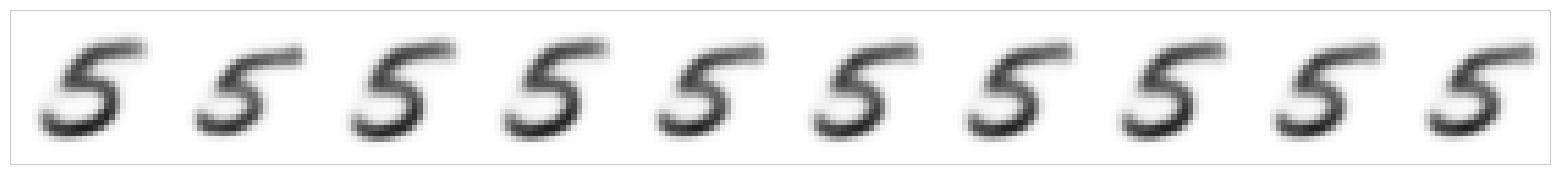

In [ ]:
plot_samples(imgs)

## Разделение (disentangling) стиля и метки

В CVAE мы полагаемся на то, что если декодер получает метку класса извне, то информация о метке не кодируется в латентном пространстве.

Можно явно внести в CVAE дополнительное требование, чтобы информация о метке класса "не утекала" в латентное пространство. Для этого можно добавить дополнительный классификатор, который будет получать на вход вектор из латентного пространства и пытаться по нему предсказать класс объекта.

Если **классификатор будет хорошо справляться с этой задачей**, то это значит, что информация о классе утекла в латентное пространство, и **за это мы должны штрафовать энкодер**.

Таким образом, энкодер будет вынужден кодировать в латентное пространство другие абстрактные признаки, вроде стиля, но не метку класса, и тогда перенос стиля будет работать еще точнее.

<img src="https://edunet.kea.su/repo/EduNet-content/L13/out/disentangling_style_and_label.png" alt="alttext" width="850">

<font size="6">Полезные материалы</font>

<font size="5">Про unsupervised learning при помощи нейросетей</font>

Главы из учебника Гудфеллоу по теме:
1. [Representation learning](https://www.deeplearningbook.org/contents/representation.html)
2. [Генеративные модели](https://www.deeplearningbook.org/contents/generative_models.html)

Про все увеличивающуюся роль unsupervised learning:
[Unsupervised Deep Learning - Google DeepMind & Facebook Artificial Intelligence NeurIPS 2018](https://www.youtube.com/watch?v=rjZCjosEFpI)

[Лекция по генеративным моделям](https://www.youtube.com/watch?v=5WoItGTWV54)

[Про проклятье размерности для классификации](https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)

<font size="5">Автоэнкодеры</font>

[Главы из учебника Гудфеллоу по теме](https://www.deeplearningbook.org/contents/autoencoders.html)

[Более подробно про PCA и ссылка на его применение для MNIST](https://ryanwingate.com/intro-to-machine-learning/unsupervised/pca-on-mnist/)

[Способы понижения размерности, PCA и разные типы автокодировщиков, лекция Техносферы](https://www.youtube.com/watch?v=W5JLSKcuaQo)

[Eigenfaces](https://ieeexplore.ieee.org/document/139758)

Удаление шума из
1. [Изображений](https://debuggercafe.com/autoencoder-neural-network-application-to-image-denoising/)
2. [Текста](https://debuggercafe.com/denoising-text-image-documents-using-autoencoders/)

[Введение в автоэнкодеры на kaggle](https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases)

<font size="5">Вариационные автоэнкодеры</font>

[Understanding Variational Autoencoders (VAEs)](https://machinelearningmastery.ru/understanding-variational-autoencoders-vaes-f70510919f73/#)

Введение в автоэнкодеры на Хабре
1. [Введение](https://habr.com/ru/post/331382/)
2. [Manifold learning и скрытые (latent) переменные](https://habr.com/ru/post/331500/)
3. [Вариационные автоэнкодеры (VAE)](https://habr.com/ru/post/331552/)
4. [Conditional VAE](https://habr.com/ru/post/331664/)
5. [GAN(Generative Adversarial Networks)](https://habr.com/ru/post/332000/)
6. [GAN + VAE](https://habr.com/ru/post/332074/)

[Оригинальная статья по VAE](https://arxiv.org/abs/1312.6114)

[Ali Ghodsi, Лекция по VAE](https://www.youtube.com/watch?v=uaaqyVS9-rM)

[Jeremy Jordan, введение в автоэнкодеры](https://www.jeremyjordan.me/autoencoders/)

[Jeremy Jordan, вариационные автоэнкодеры](https://www.jeremyjordan.me/variational-autoencoders/)

[Туториал по VAE с arxiv](https://arxiv.org/pdf/1606.05908.pdf)

[Еще одно введение в вариационные автоэнкодеры](https://livebook.manning.com/book/deep-learning-with-python/chapter-8/)

[Туториал по VAE от Google по tensorflow](https://www.tensorflow.org/tutorials/generative/cvae)

[Векторная арифметика в VAE при генерации изображений](https://blog.otoro.net/2016/04/01/generating-large-images-from-latent-vectors/)

[Генерация анимированных персонажей](https://mlexplained.wordpress.com/category/generative-models/vae/)

[VAE на PyTorch с пояснениями](https://debuggercafe.com/getting-started-with-variational-autoencoder-using-pytorch/)


[Введение в условные вариационные автоэнкодеры](https://ijdykeman.github.io/ml/2016/12/21/cvae.html)

[Репозиторий с различными модификациями вариационных автоэнкодеров](https://github.com/AntixK/PyTorch-VAE)

<font size="5">KL-дивергенция</font>

[Википедия по дивергенции Кульбака-Лейблера](https://ru.wikipedia.org/wiki/Расстояние_Кульбака_—_Лейблера)
[Мотивация KL-дивергенции](https://math.stackexchange.com/questions/90537/what-is-the-motivation-of-the-kullback-leibler-divergence)

Объяснение проблем и разницы между KL-дивергенцией, дивергенцией Йенсена-Шеннона и расстоянием Вассерштейна:
1. [Часть 1, проблемы KL-дивергенции. Дивергенция Йенсена-Шеннона](https://www.youtube.com/watch?v=_z9bdayg8ZI) и
2. [Часть 2, проблемы KL-дивергенции и дивергенции Йенсена-Шеннона. Расстояние Вассерштейна](https://www.youtube.com/watch?v=y8LGAhzCOxQ)


<font size="5">AAE</font>

[Примеры AAE на mlxnet](https://github.com/nicklhy/AdversarialAutoEncoder)

[Здесь в 6 и 8 лекции тоже можно найти примеры](https://github.com/che-shr-cat/deep-learning-for-biology-hse-2019-course)

<font size="5">Модификации автоэнкодеров</font>

[Contractive Autoencoders](http://www.icml-2011.org/papers/455_icmlpaper.pdf) — автоэнкодеры, родственные шумоподавляющим автокодировщикам.

[Variational losssy autoencoder](https://arxiv.org/pdf/1611.02731.pdf) — один из типов VAE, который пытается решить проблему того, что сильный декодер может игнорировать латентное представление.

[$\beta$- VAE](https://arxiv.org/pdf/1804.03599.pdf) — еще одно возможное улучшение VAE

[Wassershtein autoencoders](https://arxiv.org/pdf/1711.01558.pdf)

[Concrete autoencoders](https://arxiv.org/abs/1901.09346) — якобы позволяют выделять наиболее важные признаки.

<font size="6"> Примеры практического применения </font>


1. [Age Progression/Regression — предсказание того, как будет выглядеть человек в другом возрасте](https://arxiv.org/abs/1702.08423)

2. [druGAN, генерация новых химических веществ](https://pubs.acs.org/doi/10.1021/acs.molpharmaceut.7b00346)

3. [Генерация лекарств, специфически меняющих активность генов человека](https://www.frontiersin.org/articles/10.3389/fphar.2020.00269/full)

4. [Генерация ингибиторов определенного белка](https://www.nature.com/articles/s41587-019-0224-x)

5. [Получение латентных представлений транскриптомов](https://academic.oup.com/nar/article/48/10/e56/5814052)

6. [MethylNet](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-020-3443-8) — Использование метилирования генома для обучения латентного представления, помогающего в предсказании возраста и т.д.

7. [scVAE](https://academic.oup.com/bioinformatics/article-abstract/36/16/4415/5838187?redirectedFrom=fulltext) — получение данных об экспрессии генов из single cell данных

8. [U-Net](https://arxiv.org/abs/1505.04597) — сегментация медицинских изображений
9. [W-Net](https://arxiv.org/abs/1711.08506) — unsupervised сегментация медицинских изображений  